In [95]:
import openpyxl as op
import matplotlib.pyplot as plt
import timeit
import seaborn as sns
import numpy as np
import pandas as pd
from openpyxl import Workbook
import re
from IPython.display import set_matplotlib_formats
import collections
import plotly.graph_objects as go

# Read all sheets form the xlsx
#wb = op.load_workbook(r'gencode_v41_stat.tsv.xlsx')
wb = op.load_workbook(r'trial.xlsx')

# # Print sheets in worksheet
# for sh in wb.worksheets:
#     print(sh)

### Saving an intermediate excel workbook to plot from

In [70]:
wb_new=Workbook()
filepath = "/Users/mayankmurali/Desktop/biosurfer/plotting/intermediate.xlsx"
wb_new.save(filepath)
wb_intermediate = op.load_workbook(r'intermediate.xlsx')

target = wb['alignment-analysis-chr1']
wb.copy_worksheet(target)
wb.save('intermediate.xlsx')



In [71]:
wb_inter = op.load_workbook(r'intermediate.xlsx')
for sh in wb_inter.worksheets:
    sh.delete_cols(1,1)
    sh.delete_cols(2,6)
    sh.delete_cols(4,8)
    sh.delete_cols(6,8)
wb_inter.save('intermediate.xlsx')

### Plot 1: Number of isoforms vs count of splice events affecting protein region plot
Plot how many protein regions (pblocks) are affected by splicing per isoform. 

In [7]:
# for i in range(1, sh.max_row+1):
#     print("\n")
#     for j in range(1, sh.max_column+1):
#         cell_obj = sh.cell(row=i, column=j)
#         print(cell_obj.value, end=" ")

In [96]:
# Dictionaries to store count of affected protein regions or pblocks
pb_stats = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
# For three splicing events
pb_stats_I = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
pb_stats_D = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
pb_stats_S = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}

#Loop through sheets to populate the dictionary
for sh in wb.worksheets:
    #Variables to keep tarck of count
    count=1
    count_i=1
    count_d=1
    count_s=1

    #Loop through rows of a sheet (excludes header)
    for i in range(2, sh.max_row):
        # Alt isoform values for 2 cells to compare
        c1_iso, c2_iso = sh.cell(row=i, column=2), sh.cell(row=i+1, column=2)
        # Pblock values for 2 cells to compare
        c1_pb, c2_pb = sh.cell(row=i, column=9), sh.cell(row=i+1, column=9)
        #print(c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)

        # Both cells have same isoforms
        if c1_iso.value == c2_iso.value:
            # Have different pblocks
            if c1_pb.value != c2_pb.value:
                #print("Different pb for same iso ",c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)
                count+=1
                c=str(c1_pb.value)
                # Check for different events
                if c.startswith("I"):
                    count_i+=1
                elif c.startswith("D"):
                    count_d+=1
                elif c.startswith("S"):
                    count_s+=1
            
        #When isoforms are different
        else:
            # # To get isoforms with extreme values
            # if count > 10:
            #     print(c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)

            # Updating count
            pb_stats[count]+=1
            pb_stats_I[count_i]+=1
            pb_stats_D[count_d]+=1
            pb_stats_S[count_s]+=1
            count=1
            count_i=1
            count_d=1
            count_s=1
            
            # pblocks shared between two different transcripts
            # if c1_pb.value == c2_pb.value:
            #     print(c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)
            #print(count)
        
        #print(pb_stats,'\n')

In [97]:
# Printing the dictionaries
print(pb_stats)
print(pb_stats_I)
print(pb_stats_D)
print(pb_stats_S)
print(sh.max_row)


{1: 38047, 2: 7344, 3: 1035, 4: 219, 5: 65, 6: 16, 7: 5, 8: 2, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 2, 15: 0}
{1: 45726, 2: 976, 3: 33, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
{1: 42263, 2: 4215, 3: 219, 4: 31, 5: 4, 6: 2, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
{1: 42703, 2: 3546, 3: 385, 4: 74, 5: 18, 6: 5, 7: 2, 8: 2, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}
1532


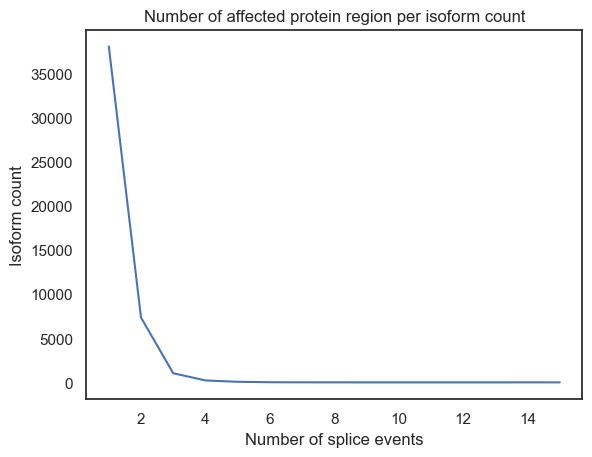

In [42]:
# Line plot
myList = pb_stats.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.xlabel('Number of splice events')
plt.ylabel('Isoform count')
plt.title('Number of affected protein region per isoform count')
plt.show()

plt.scatter() 2.2825793210067786
plt.plot() 0.4927176779892761


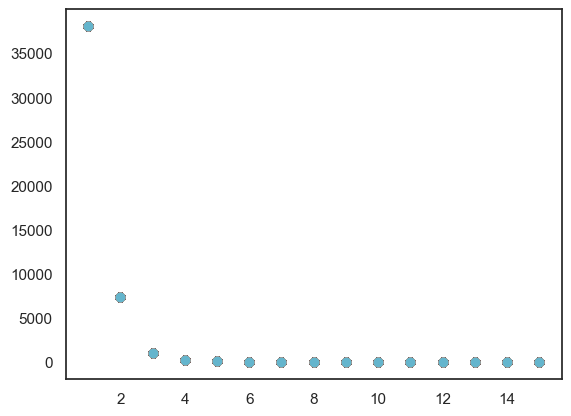

In [37]:
# Scatter plot
event_count = pb_stats.values()
isoform_count = pb_stats.keys()

print(
    "plt.scatter()",
    timeit.timeit(
        "plt.scatter(isoform_count, event_count)",
        number=1000,
        globals=globals(),
    ),
)
print(
    "plt.plot()",
    timeit.timeit(
        "plt.plot(isoform_count, event_count, 'o')",
        number=1000,
        globals=globals(),
    ),
)


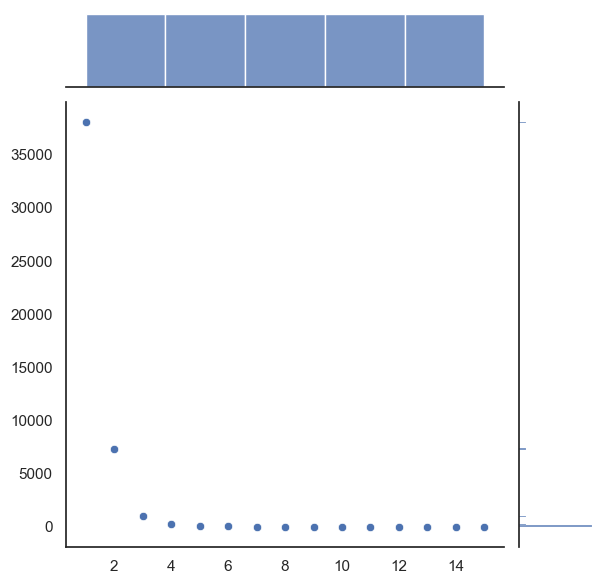

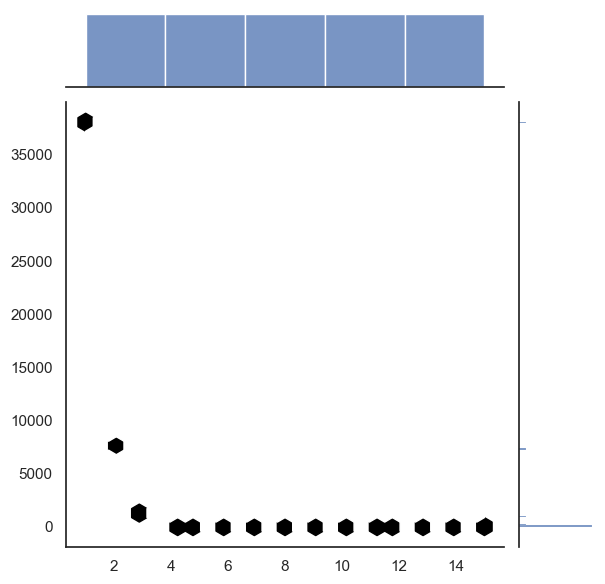

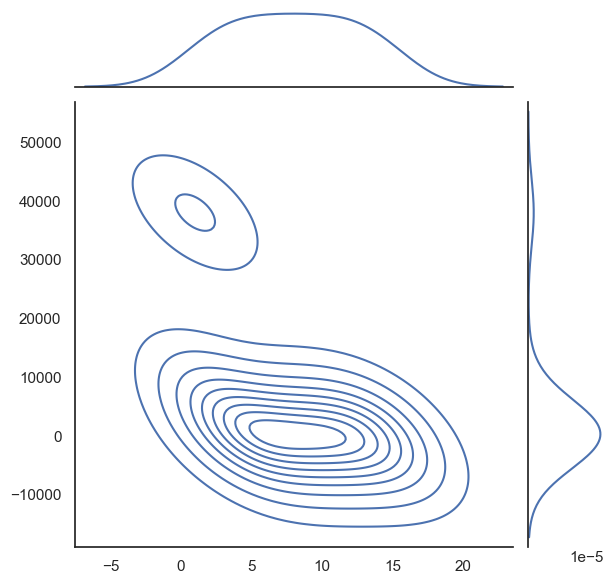

In [39]:
# Join plots
sns.jointplot(x=isoform_count, y=event_count, kind='scatter')
sns.jointplot(x=isoform_count, y=event_count, kind='hex')
sns.jointplot(x=isoform_count, y=event_count, kind='kde')

plt.show()

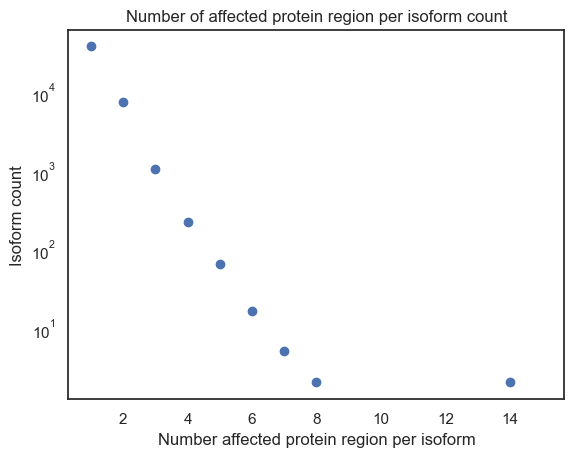

In [44]:
# Basic chart
fig=plt.plot(isoform_count, event_count, linestyle='none', marker='o')

# Show the graph
plt.yscale('log')
plt.xlabel('Number affected protein region per isoform')
plt.ylabel('Isoform count')
plt.title('Number of affected protein region per isoform count')
fig = plt.gcf()

plt.show()
fig.savefig('isoform_event.png',dpi=1200)

In [83]:
import statistics
val = list(pb_stats.values())
mean_val = statistics.mean(val)
print(mean_val)

3117.133333333333


/var/folders/yj/q7ccjqsx2rg2czn92rx0_8sc0000gn/T/ipykernel_53246/2172101317.py:2: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning:

print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later



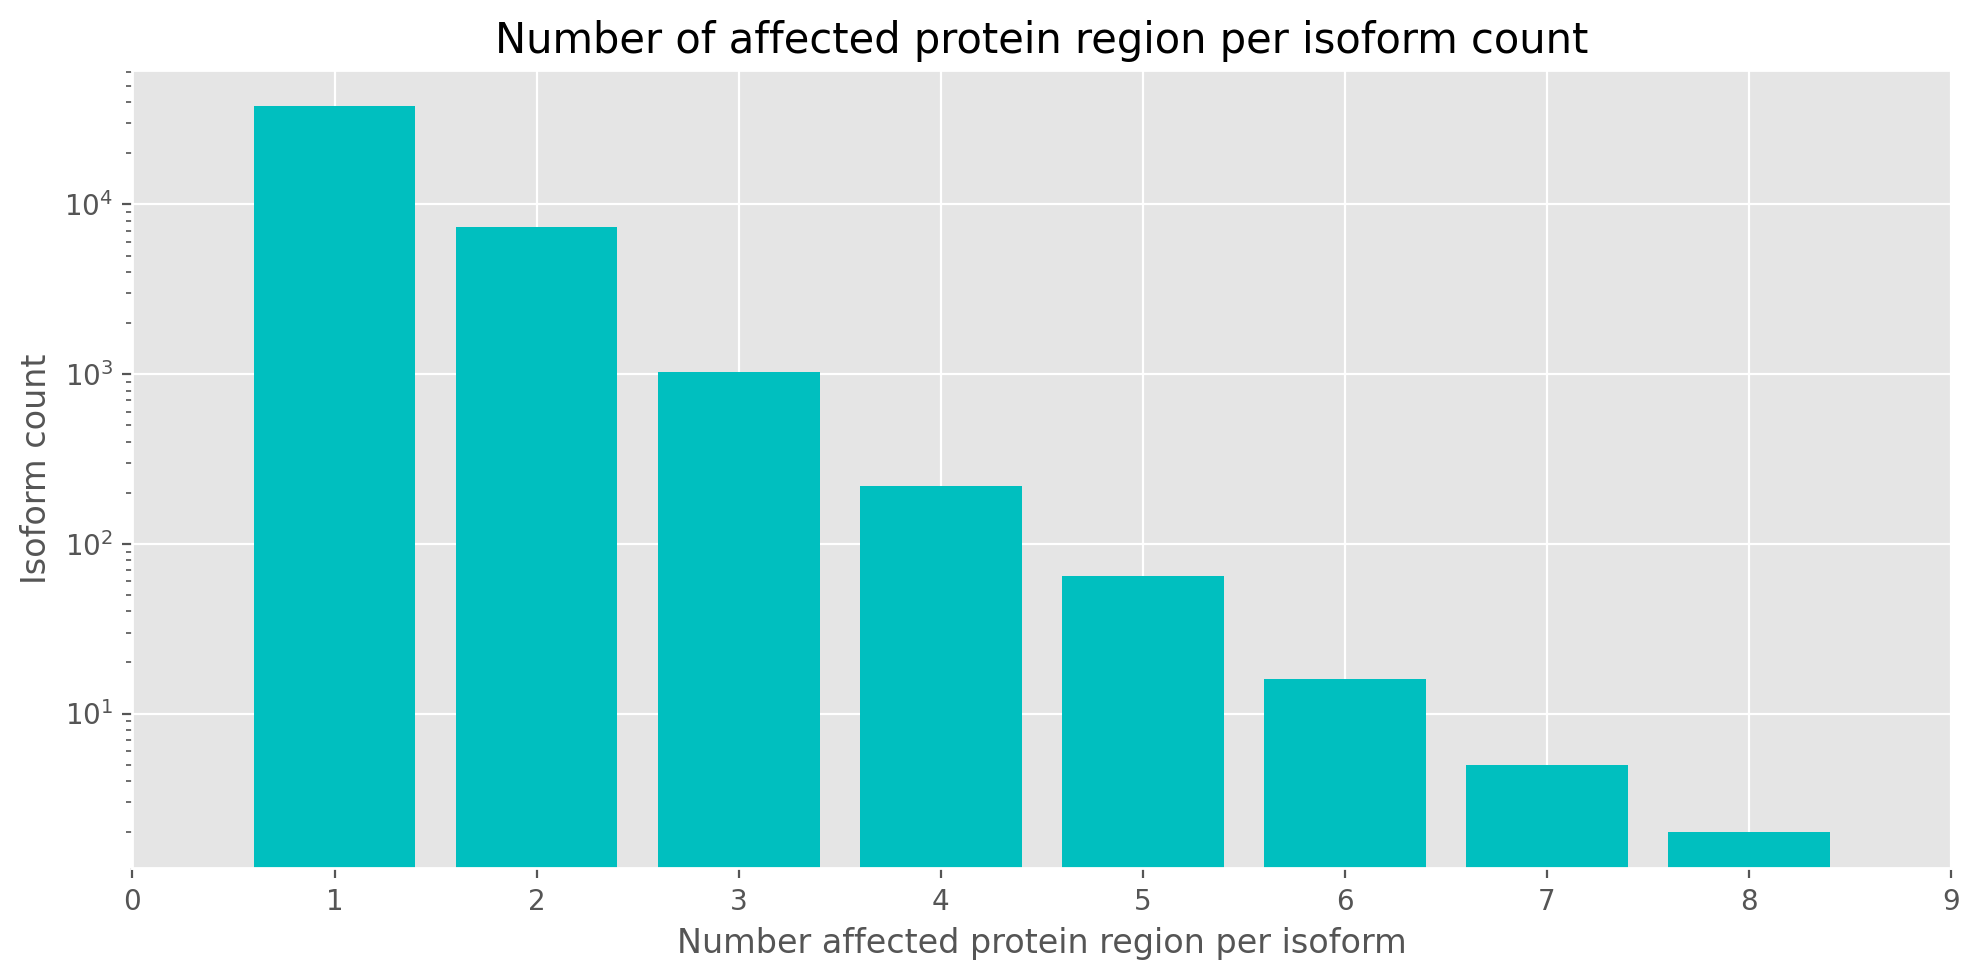

In [98]:

set_matplotlib_formats('retina', quality=1200)


plt.rcParams["figure.autolayout"] = True
plt.style.available
plt.style.use('ggplot')


plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xlim(0, 9)
#plt.yticks([10 * i for i in range(11)])
# #avg line
# plt.axhline(mean_val, color='red', linestyle='dotted', linewidth=1)
plt.xlabel('Number affected protein region per isoform')
plt.ylabel('Isoform count')
plt.title('Number of affected protein region per isoform count', fontsize=15)
plt.bar(pb_stats.keys(), pb_stats.values(), width=0.8, color='c')
fig = plt.gcf()
fig.tight_layout()
plt.show()

#Saving figure
fig.savefig('isoform_pblock_count_histogram.png',dpi=1200)


In [87]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(x=pb_stats.keys(), y=pb_stats.values(), labels={'x':'Number affected protein region per isoform', 'y':'Isoform count'})
fig.update_xaxes(range = [0,9])
fig.update_layout(yaxis_type="log")

### Plot 2: Size of affected protein regions vs number of isoform aggregate plot
To see what's the size of the pblocks being affected per isoform


In [172]:

pb_stats = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
pb_stats_size = []
pb_stats_size_I=[]
pb_stats_size_D=[]
pb_stats_size_S=[]
dud = []

pb_stats_I = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
pb_stats_D = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
pb_stats_S = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}

def getsize(c1_pb_val, sh, c1_iso_val):
    temp = re.findall(r'\d+', c1_pb_val)
    res = list(map(int, temp))
    size = res[1]-res[0]
    if  size == 0:
        # print(sh, " : ", c1_iso_val, " : ", c1_pb_val, " : " ,str(res)," : ", size)
        size = res[3]-res[2]
    pb_stats_size.append(size)
    if c1_pb_val.startswith("I"):
        pb_stats_size_I.append(size)
    elif c1_pb_val.startswith("D"):
        pb_stats_size_D.append(size)
    elif c1_pb_val.startswith("S"):
        pb_stats_size_S.append(size)
    #print(sh, " : ", c1_iso_val, " : ", c1_pb_val, " : " ,str(res)," : ", size)
    return 0

for sh in wb.worksheets:
    count=1
    count_i=1
    count_d=1
    count_s=1
    for i in range(2, sh.max_row):
        c1_iso = sh.cell(row=i, column=2)
        c2_iso = sh.cell(row=i+1, column=2)
        c1_pb = sh.cell(row=i, column=9)
        c2_pb = sh.cell(row=i+1, column=9)
        #print(c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)

        # When iso are same
        if c1_iso.value == c2_iso.value:
            if c1_pb.value != c2_pb.value:
                #pblock is different for the iso
                #print("Different pb for same iso ",c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)
                count+=1
                getsize(c1_pb.value, sh, c1_iso.value)
                c=str(c1_pb.value)
                if c.startswith("I"):
                    count_i+=1
                elif c.startswith("D"):
                    count_d+=1
                elif c.startswith("S"):
                    count_s+=1
        
            #else:
                #print("Same pb for same iso ",c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)
                #print(count)
            
        #When iso are different
        else: 
            getsize(c1_pb.value, sh, c1_iso.value)
            pb_stats[count]+=1
            pb_stats_I[count_i]+=1
            pb_stats_D[count_d]+=1
            pb_stats_S[count_s]+=1
            count=1
            count_i=1
            count_d=1
            count_s=1
            
            # pblocks shared between two different transcripts
            # if c1_pb.value == c2_pb.value:
            #     print(c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)
            #print(count)
        
        #print(pb_stats,'\n')

In [173]:
counter = collections.Counter(pb_stats_size)
#counter=sorted(counter.items())

#print(counter)
x1 = list(counter.keys())
y1 = list(counter.values())

average_size = sum(pb_stats_size)/len(pb_stats_size)
print(average_size)
print(statistics.median(pb_stats_size))

221.9401751227782
81


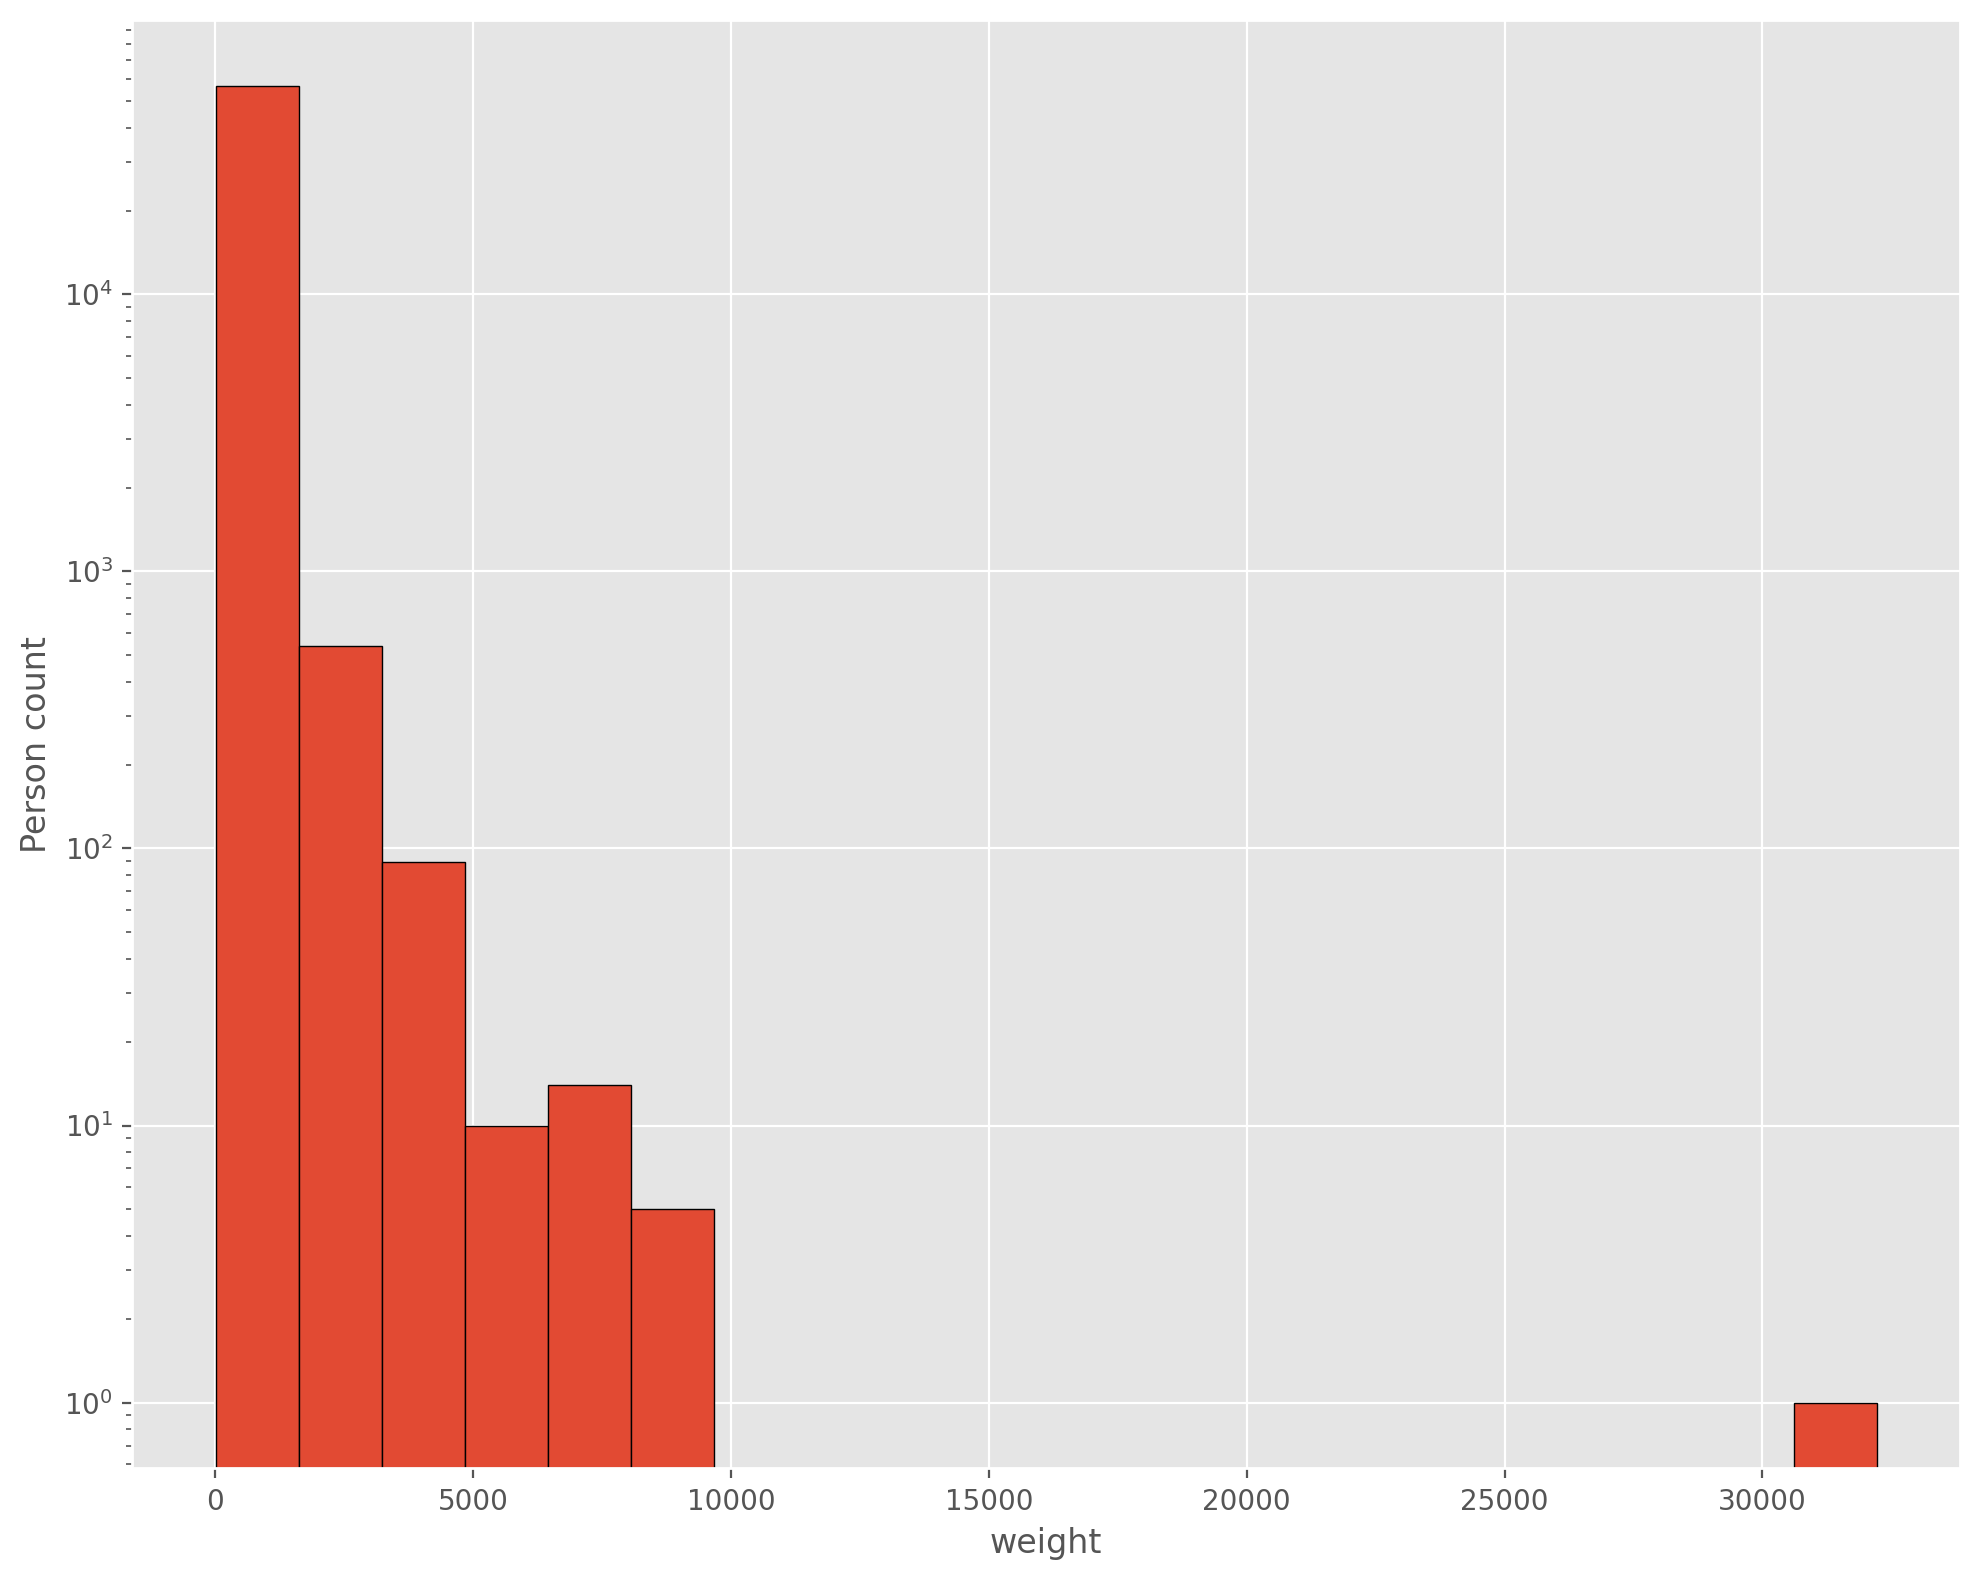

In [136]:
plt.hist(pb_stats_size, bins=20, edgecolor='black')
plt.xlabel('weight')
plt.ylabel('Person count')
plt.yscale('log')
plt.show()

/var/folders/yj/q7ccjqsx2rg2czn92rx0_8sc0000gn/T/ipykernel_53246/3958316377.py:1: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning:

print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later



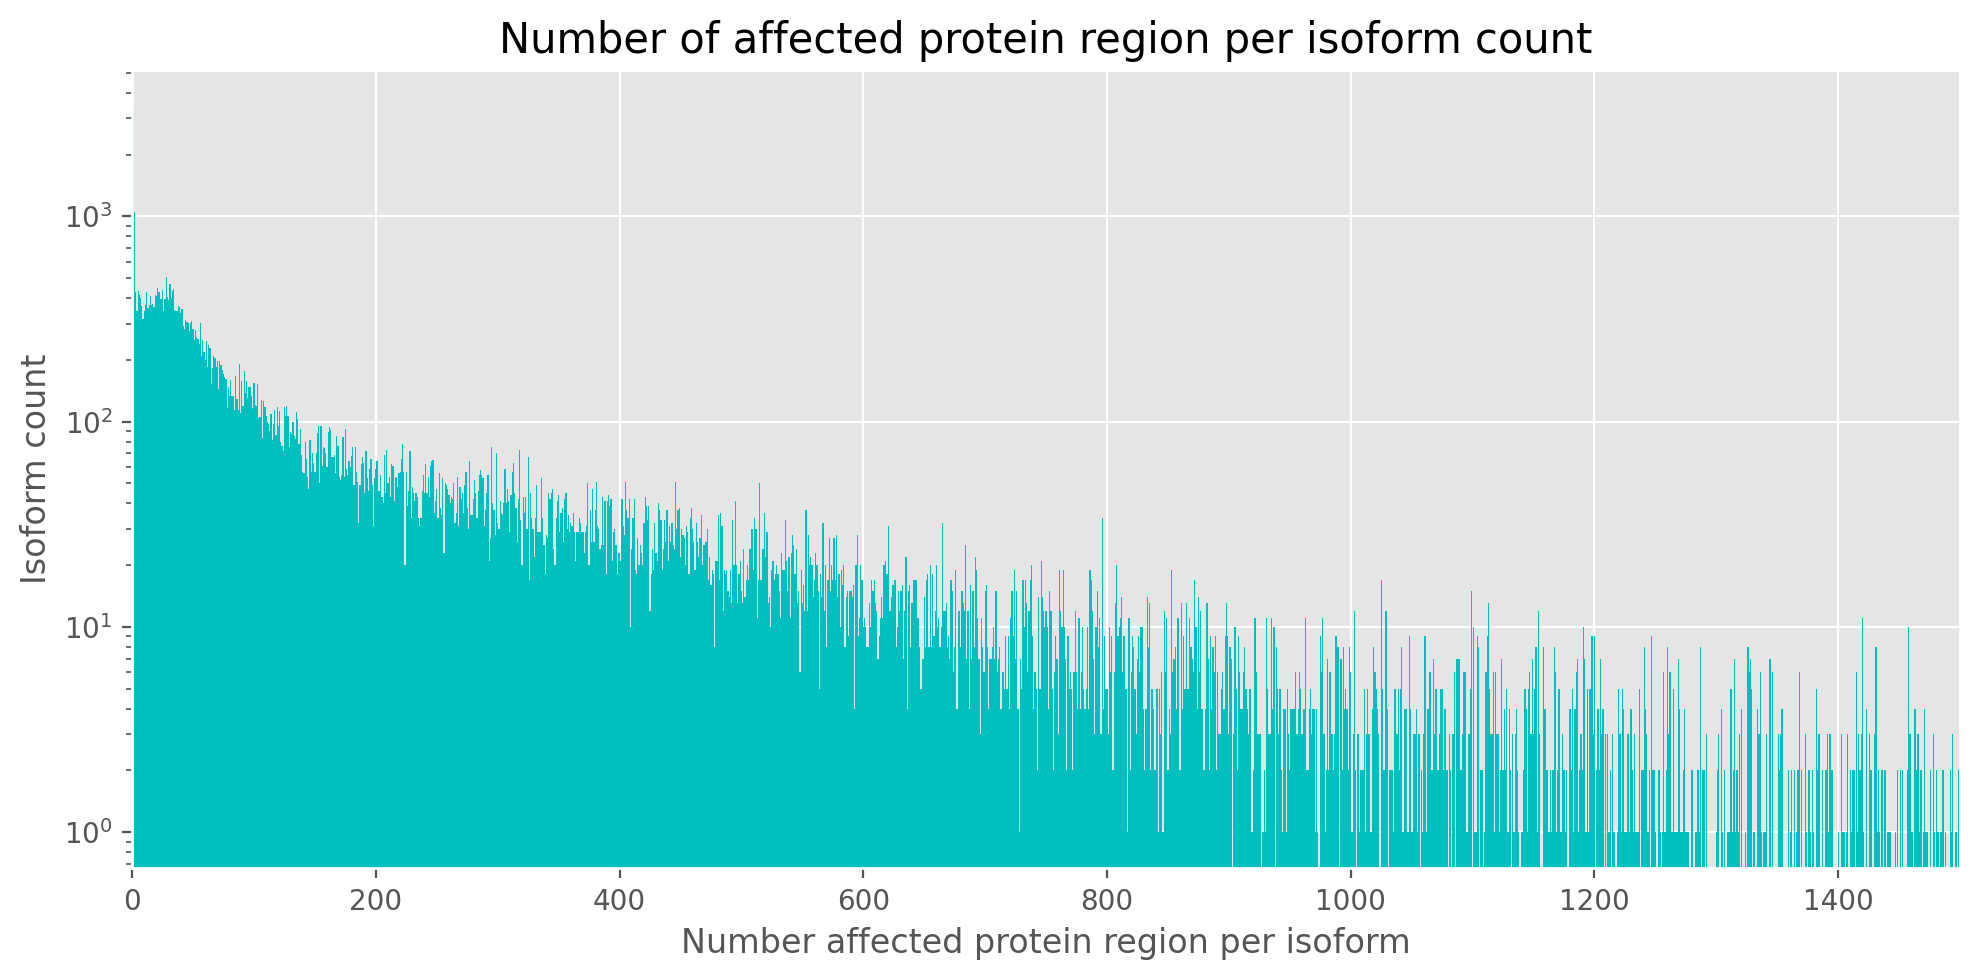

In [174]:
set_matplotlib_formats('retina', quality=1200)
plt.rcParams["figure.autolayout"] = True
plt.style.available
plt.style.use('ggplot')


plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xlim(0,1500)
#plt.yticks([10 * i for i in range(11)])
# #avg line
# plt.axhline(mean_val, color='red', linestyle='dotted', linewidth=1)
plt.xlabel('Number affected protein region per isoform')
plt.ylabel('Isoform count')
plt.title('Number of affected protein region per isoform count', fontsize=15)
plt.bar(x1, y1, width=1, color='c')
fig = plt.gcf()
fig.tight_layout()
plt.show()

#Saving figure
fig.savefig('isoform_pblock_size_histogram.png',dpi=1200)


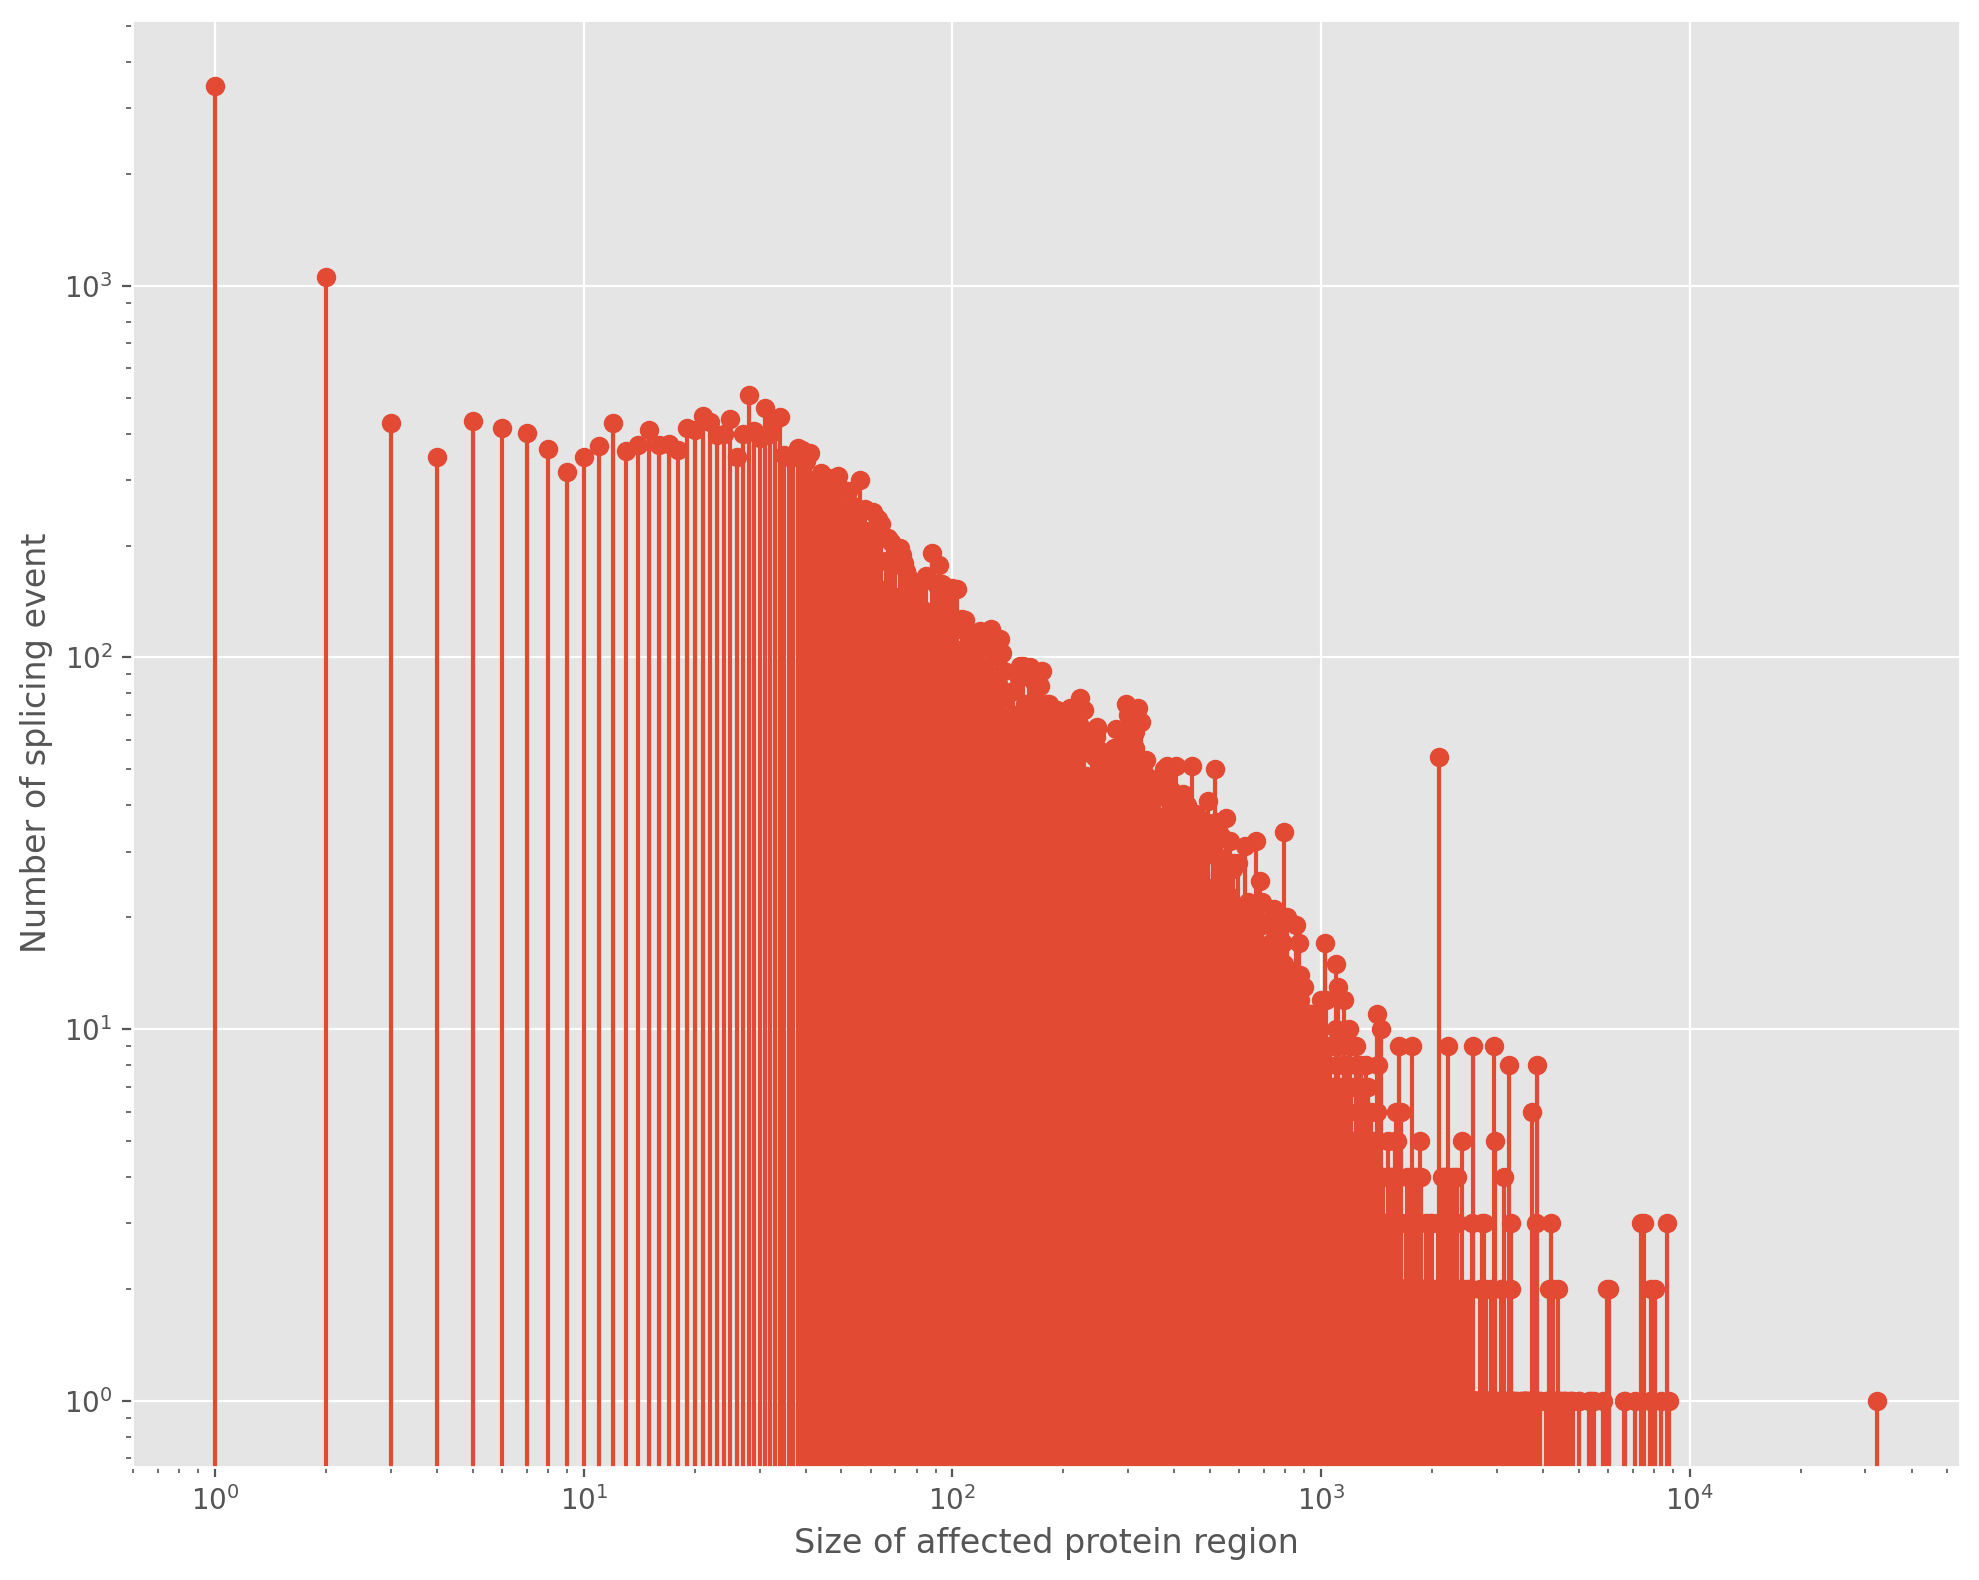

In [160]:
# Lollipop plot 
plt.stem(x1, y1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Size of affected protein region')
plt.ylabel('Number of splicing event')

fig = plt.gcf()

plt.show()
#fig.savefig('isoform_event_size.png',dpi=1200)


/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning:

print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later



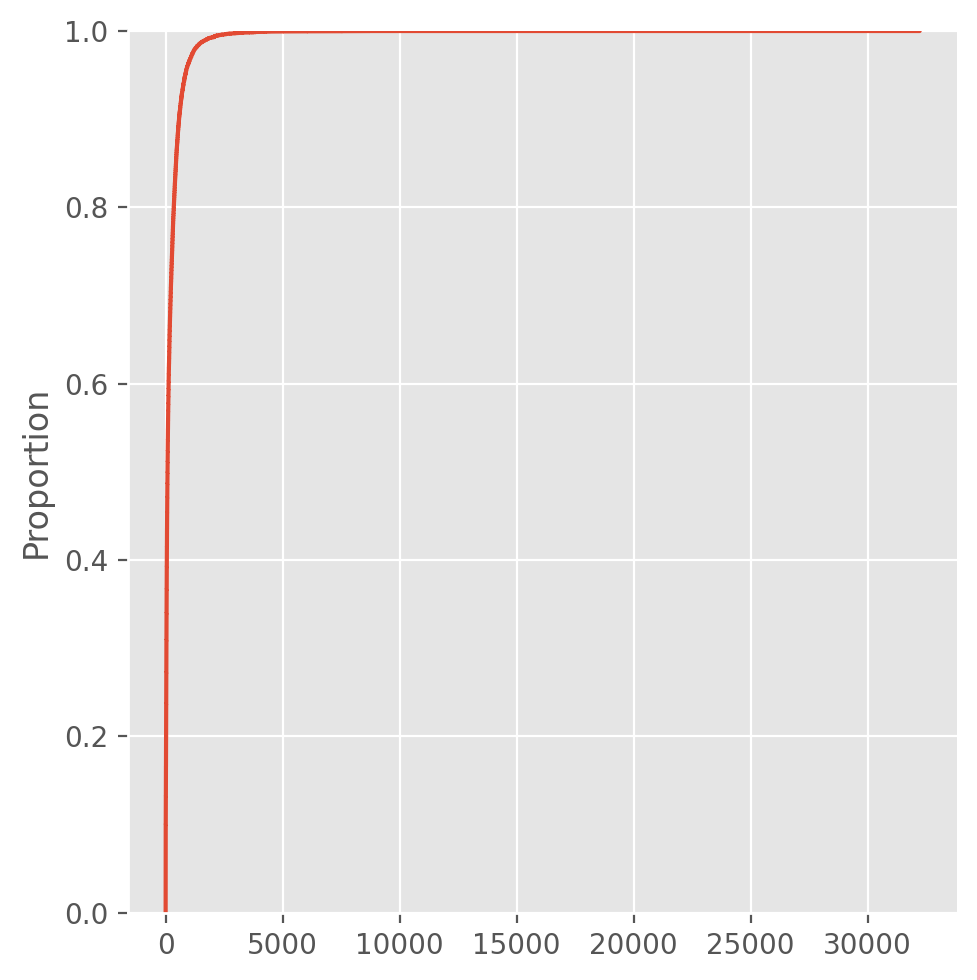

In [161]:
import seaborn as sns
sns.displot(pb_stats_size, kind="ecdf")

In [57]:
fig = go.Figure(data=[go.Scatter(
    x=x1,
    y=y1,
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=[5, 15, 30, 40, 50, 65],
        showscale=True
        )
)])

fig.show()

In [176]:
counter = collections.Counter(pb_stats_size_I)
#print(counter)
xi = list(counter.keys())
yi = list(counter.values())

counter = collections.Counter(pb_stats_size_D)
#print(counter)
xd = list(counter.keys())
yd = list(counter.values())

counter = collections.Counter(pb_stats_size_S)
#print(counter)
xs = list(counter.keys())
ys = list(counter.values())

Per I/D/S

/var/folders/yj/q7ccjqsx2rg2czn92rx0_8sc0000gn/T/ipykernel_53246/842119349.py:3: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning:

print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later



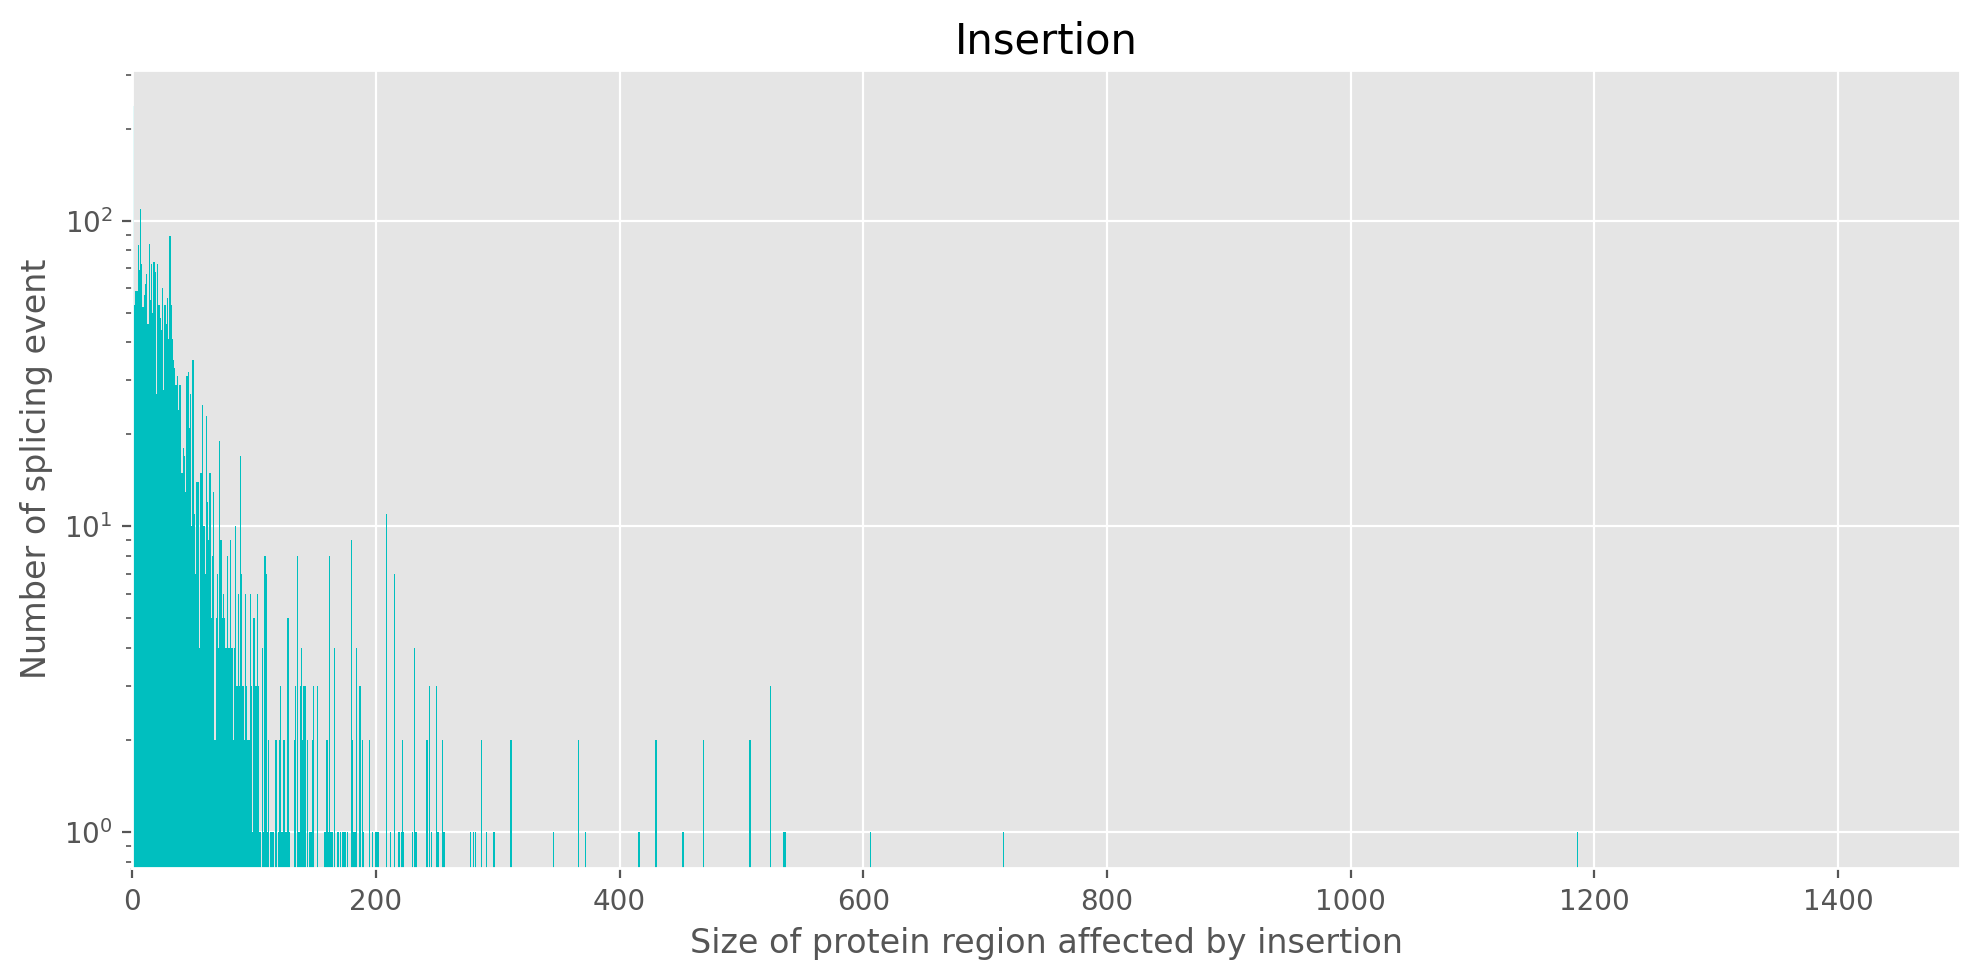

/var/folders/yj/q7ccjqsx2rg2czn92rx0_8sc0000gn/T/ipykernel_53246/842119349.py:29: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning:

print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later



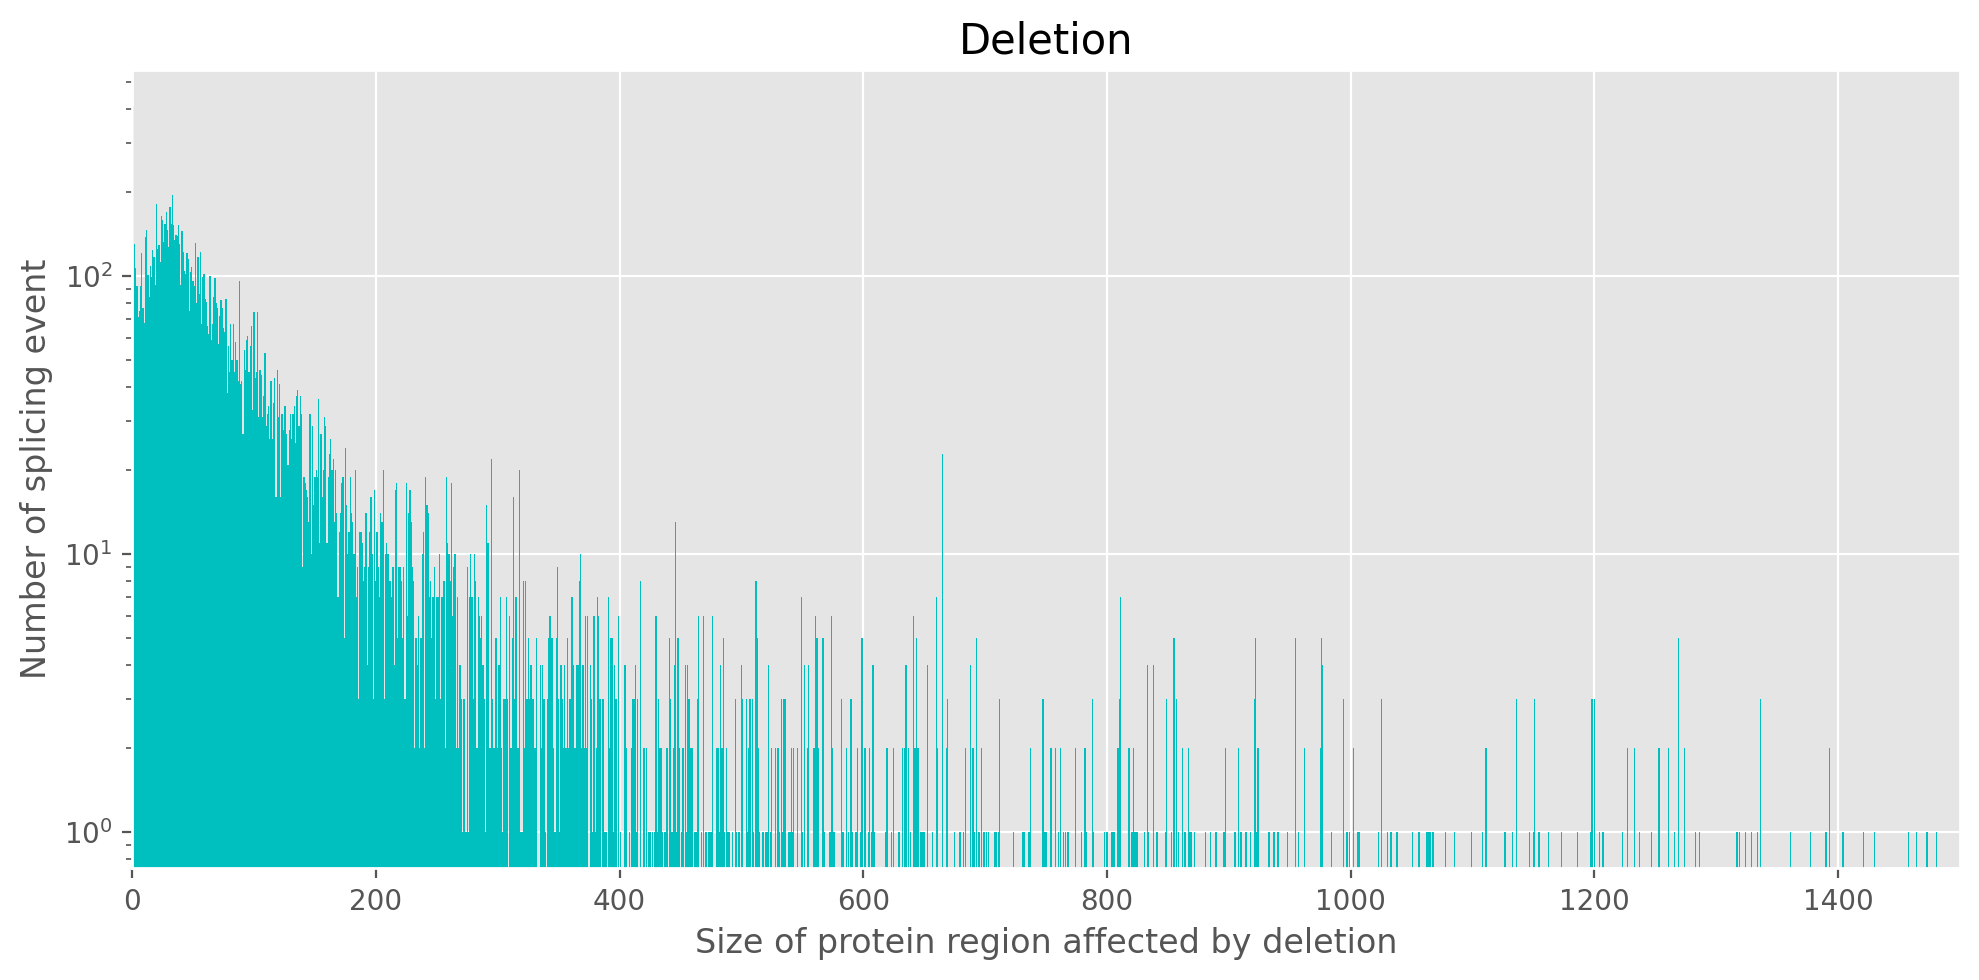

/var/folders/yj/q7ccjqsx2rg2czn92rx0_8sc0000gn/T/ipykernel_53246/842119349.py:55: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning:

print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later



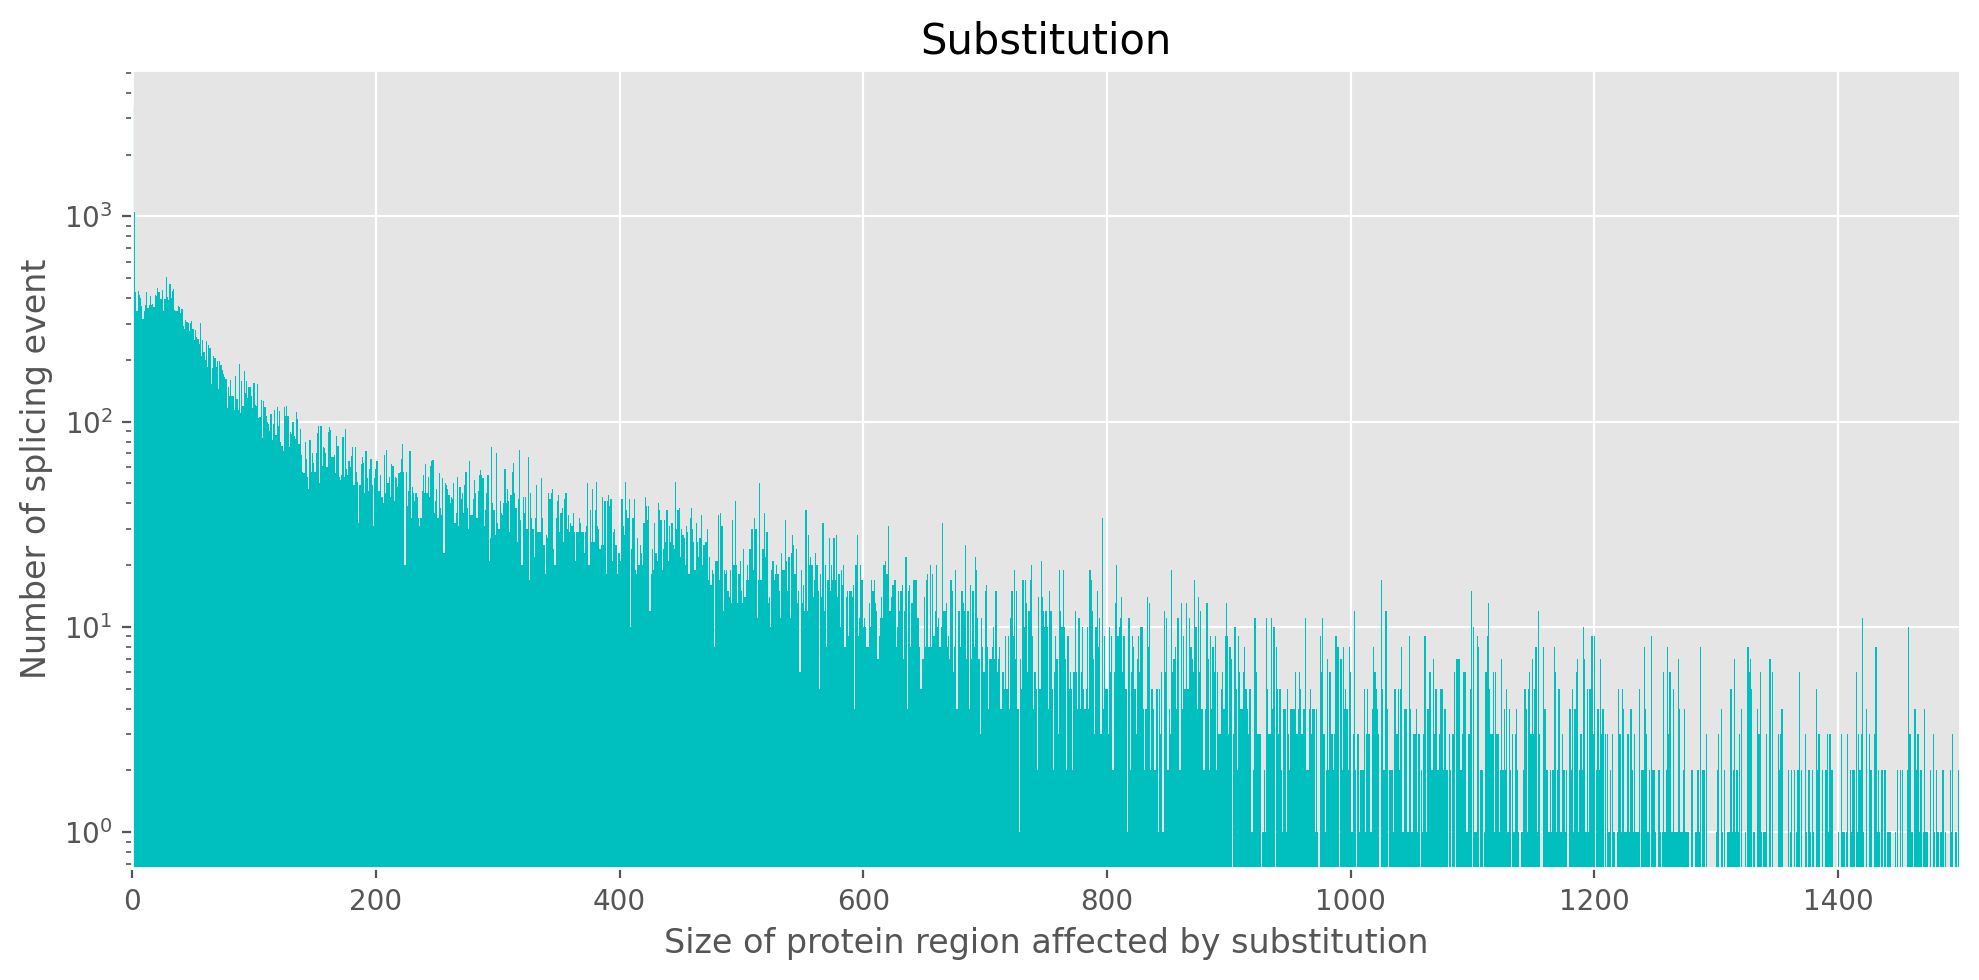

In [184]:
#I

set_matplotlib_formats('retina', quality=1200)
plt.rcParams["figure.autolayout"] = True
plt.style.available
plt.style.use('ggplot')


plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xlim(0,1500)
#plt.yticks([10 * i for i in range(11)])
# #avg line
# plt.axhline(mean_val, color='red', linestyle='dotted', linewidth=1)
plt.title("Insertion", fontsize=15)
plt.xlabel('Size of protein region affected by insertion')
plt.ylabel('Number of splicing event')

plt.bar(xi, yi, width=1, color='c')
fig = plt.gcf()
fig.tight_layout()
plt.show()

#Saving figure
fig.savefig('isoform_pblock_size_histogram_I.png',dpi=1200)

#D

set_matplotlib_formats('retina', quality=1200)
plt.rcParams["figure.autolayout"] = True
plt.style.available
plt.style.use('ggplot')


plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xlim(0,1500)
#plt.yticks([10 * i for i in range(11)])
# #avg line
# plt.axhline(mean_val, color='red', linestyle='dotted', linewidth=1)
plt.title("Deletion", fontsize=15)
plt.xlabel('Size of protein region affected by deletion')
plt.ylabel('Number of splicing event')

plt.bar(xd, yd, width=1, color='c')
fig = plt.gcf()
fig.tight_layout()
plt.show()

#Saving figure
fig.savefig('isoform_pblock_size_histogram_D.png',dpi=1200)

#S

set_matplotlib_formats('retina', quality=1200)
plt.rcParams["figure.autolayout"] = True
plt.style.available
plt.style.use('ggplot')


plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xlim(0,1500)
#plt.yticks([10 * i for i in range(11)])
# #avg line
# plt.axhline(mean_val, color='red', linestyle='dotted', linewidth=1)
plt.title("Substitution", fontsize=15)
plt.xlabel('Size of protein region affected by substitution')
plt.ylabel('Number of splicing event')

plt.bar(x1, y1, width=1, color='c')
fig = plt.gcf()
fig.tight_layout()
plt.show()

#Saving figure
fig.savefig('isoform_pblock_size_histogram_S.png',dpi=1200)

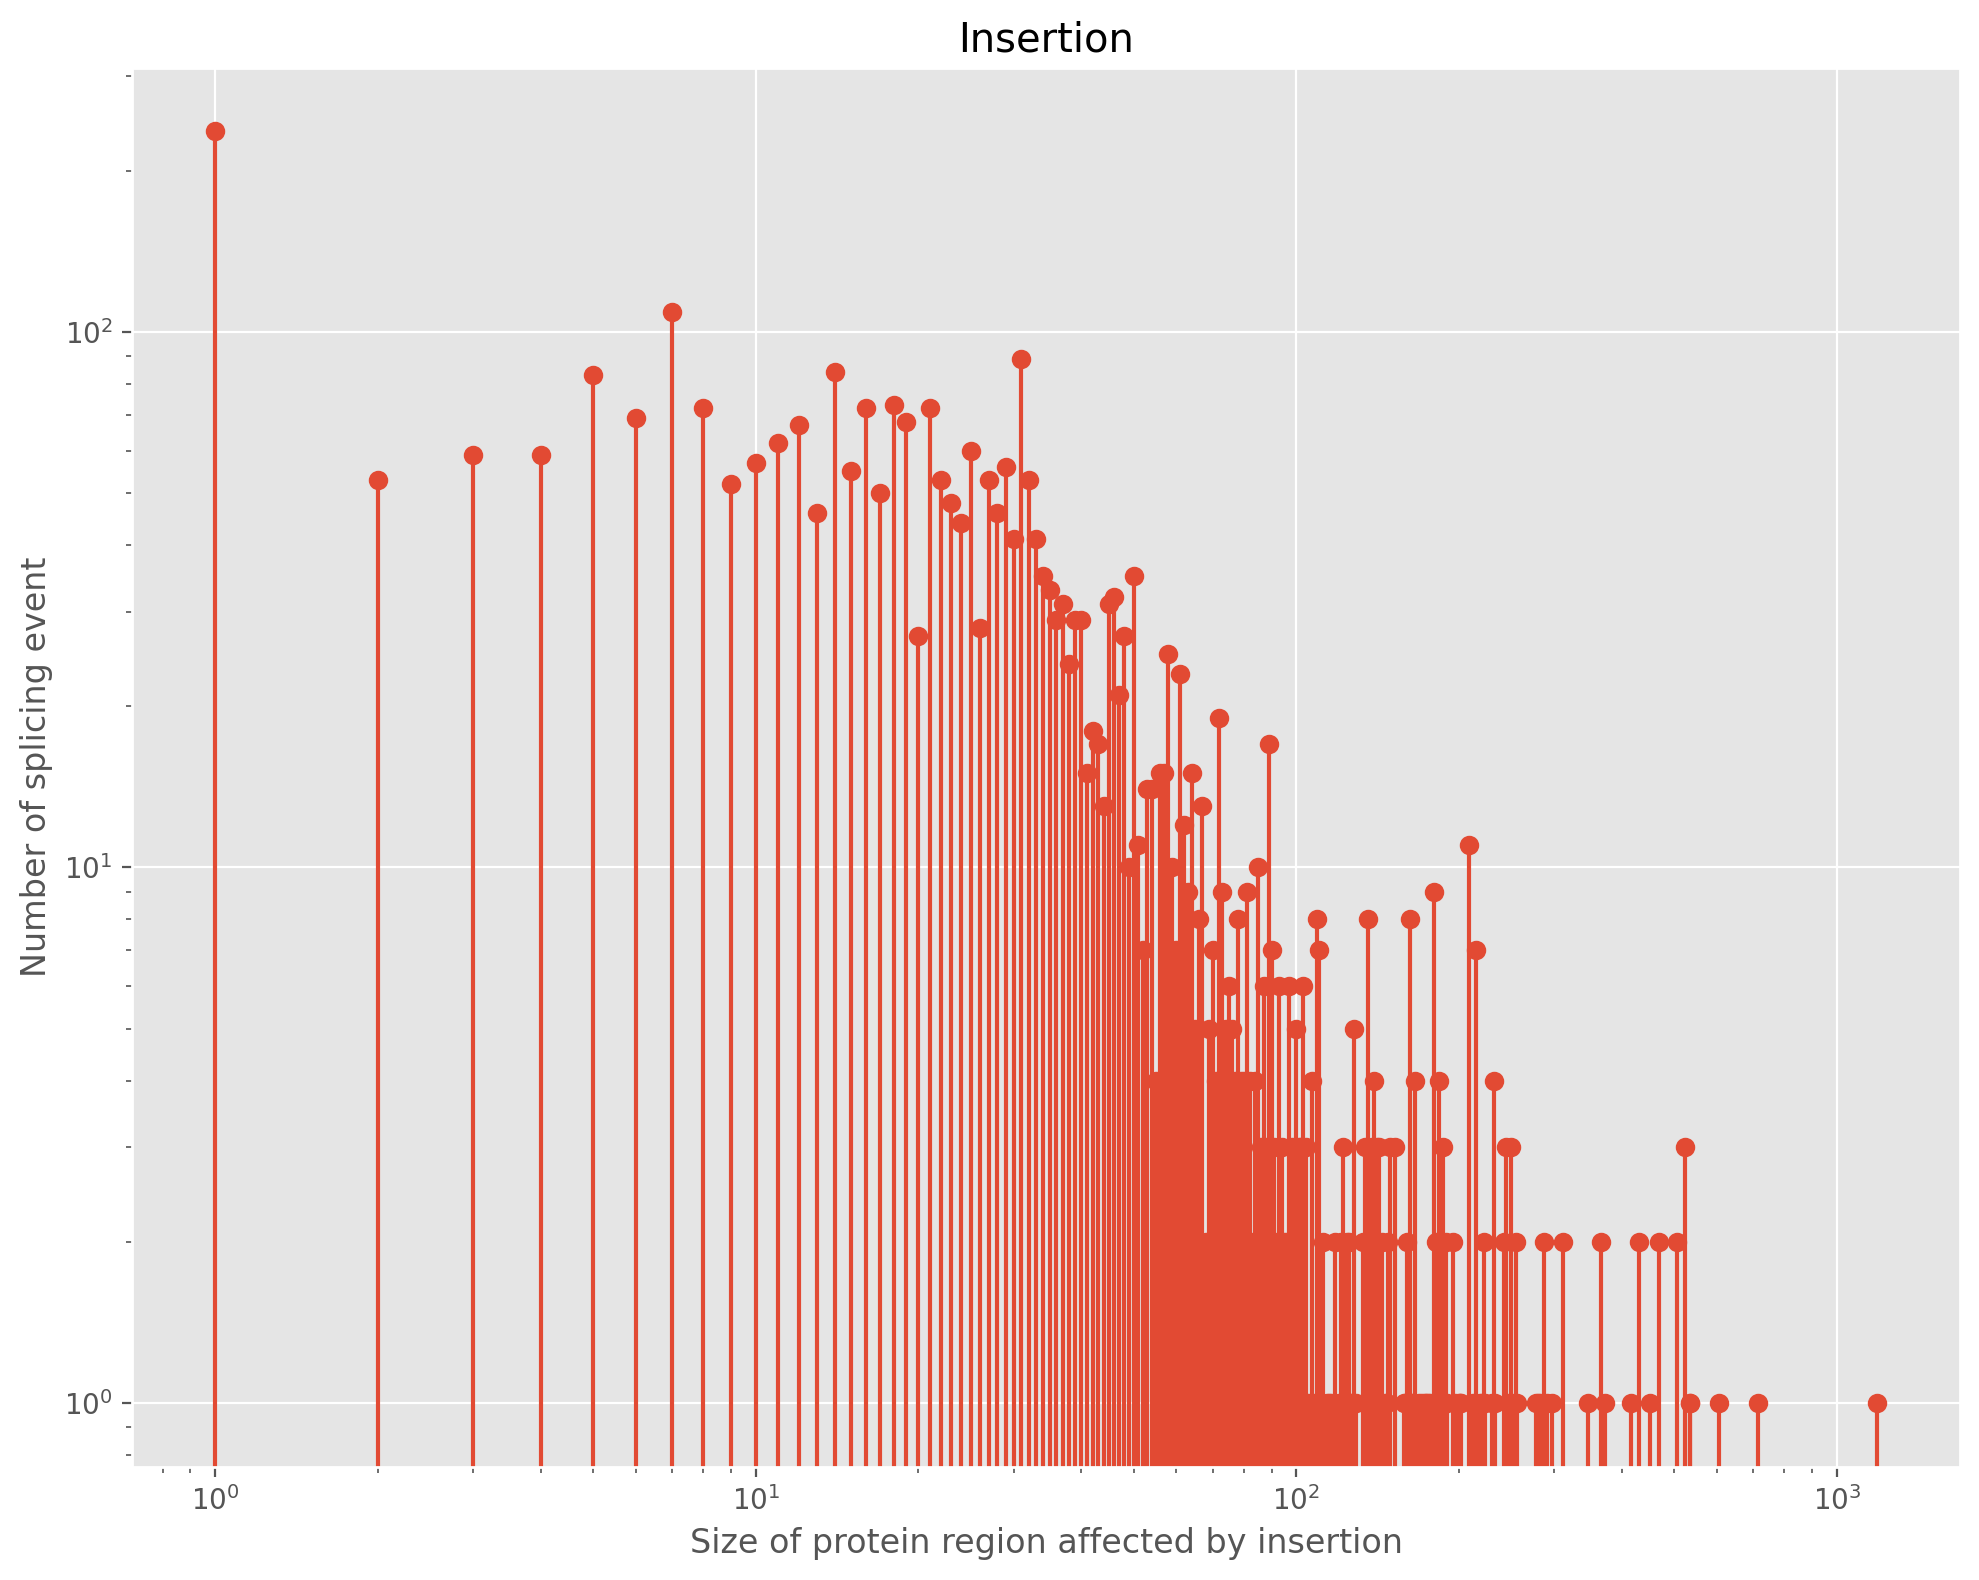

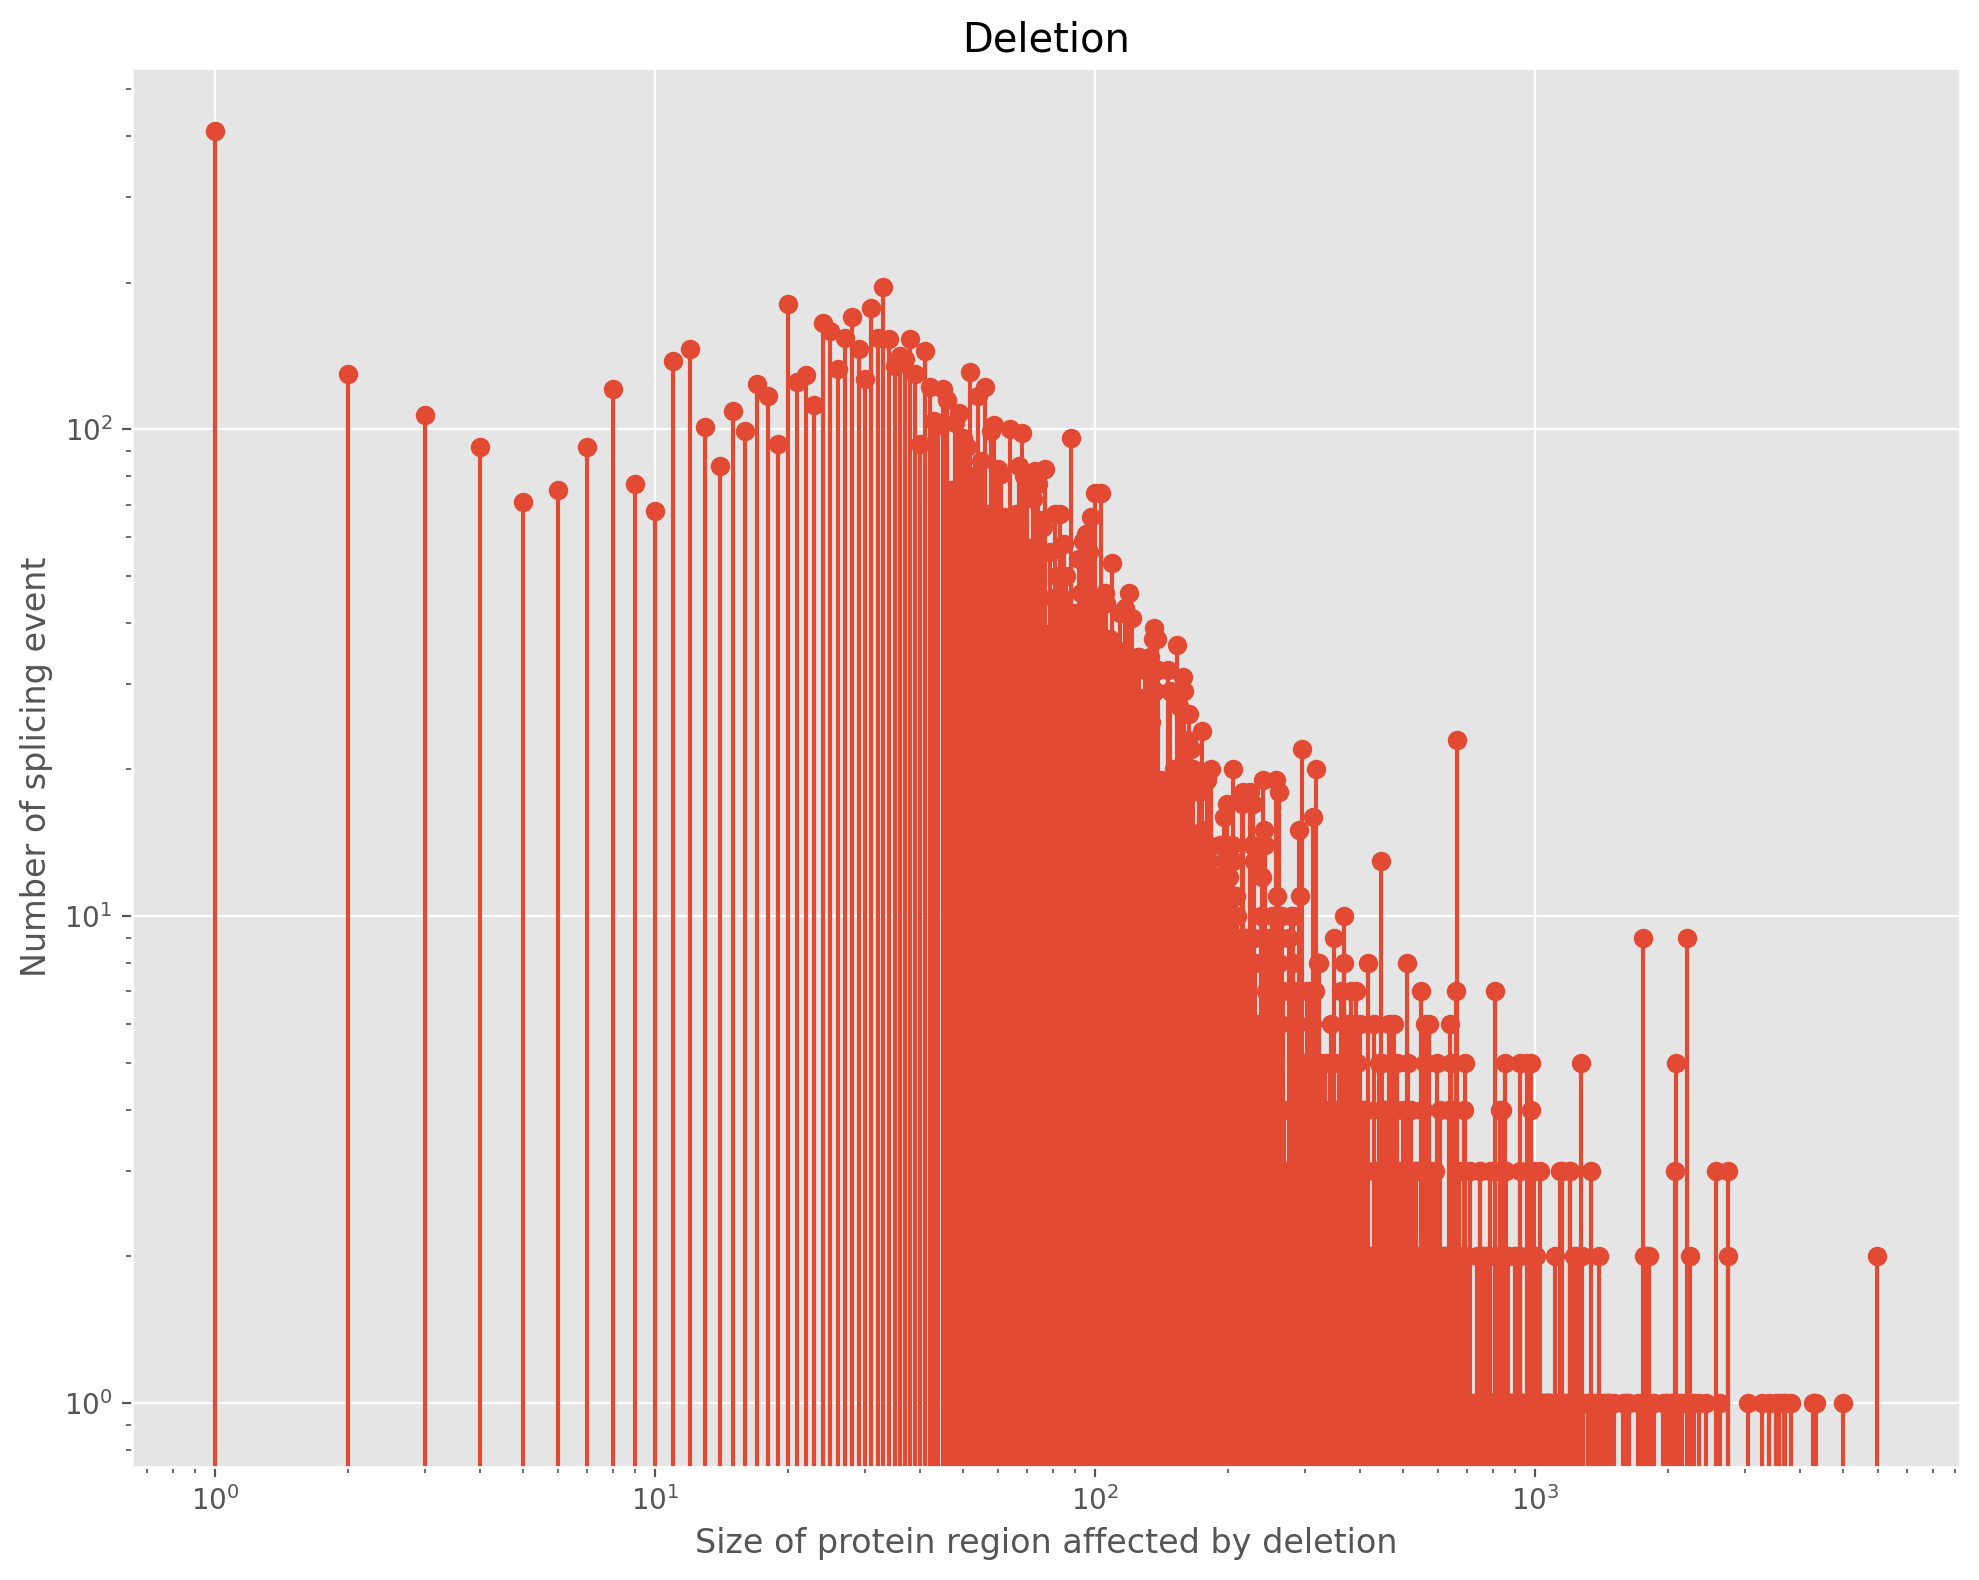

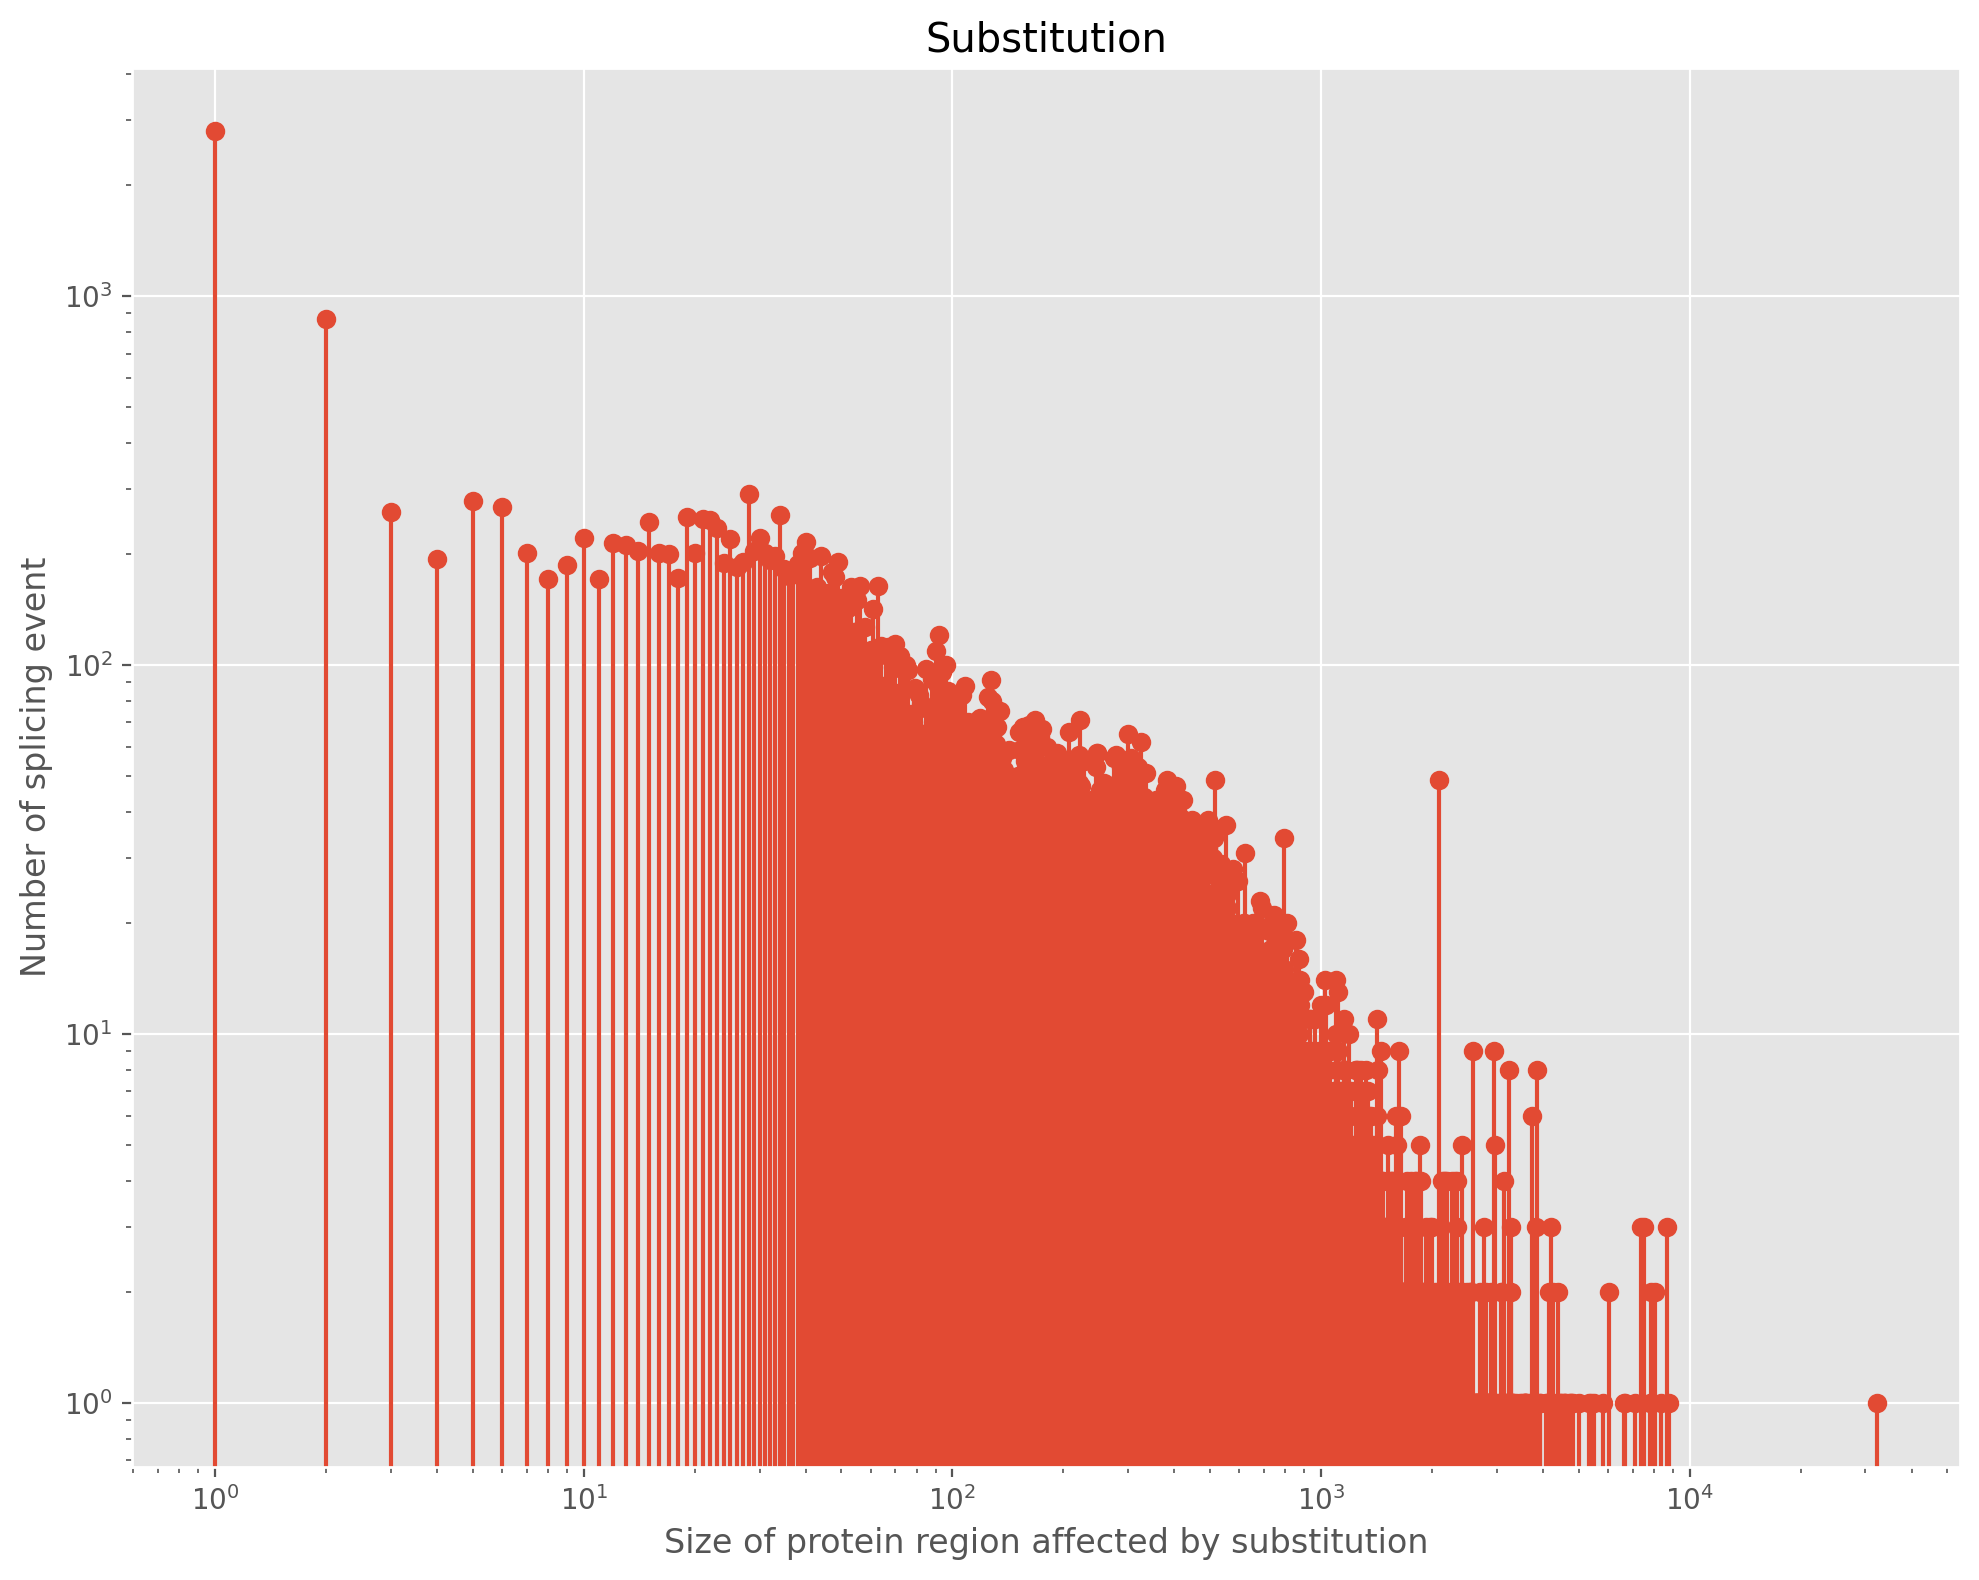

In [177]:

x = xi
y = yi

plt.stem(x, y)
plt.yscale('log')
plt.xscale('log')
plt.title("Insertion")
plt.xlabel('Size of protein region affected by insertion')
plt.ylabel('Number of splicing event')

fig = plt.gcf()

plt.show()
fig.savefig('isoform_event_size_I.png',dpi=1200)



x = xd
y = yd

plt.stem(x, y)
plt.yscale('log')
plt.xscale('log')
plt.title("Deletion")
plt.xlabel('Size of protein region affected by deletion')
plt.ylabel('Number of splicing event')

fig = plt.gcf()

plt.show()
fig.savefig('isoform_event_size_D.png',dpi=1200)



x = xs
y = ys

plt.stem(x, y)
plt.yscale('log')
plt.xscale('log')
plt.title("Substitution")
plt.xlabel('Size of protein region affected by substitution')
plt.ylabel('Number of splicing event')

fig = plt.gcf()

plt.show()
fig.savefig('isoform_event_size_S.png',dpi=1200)


### Number of isoforms vs count of splice events affecting protein region plot for ragged and clean I/D/S

In [9]:

for sh in wb.worksheets:
    print(sh)
pb_stats = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
pb_stats_size = []
pb_stats_size_I=[]
pb_stats_size_D=[]
pb_stats_size_S=[]
pb_stats_size_rI=[]
pb_stats_size_rD=[]
pb_stats_size_rS=[]
c_rd=False
c_re=False


pb_stats_I = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
pb_stats_D = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}
pb_stats_S = {1:0, 2:0,3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}


def getsize(c1_pb_val, sh, c1_iso_val, c_re, c_rd):
    temp = re.findall(r'\d+', c1_pb_val)
    res = list(map(int, temp))
    size = res[3]-res[2]
    # if  size == 0:
    #     print(sh, " : ", c1_iso_val, " : ", c1_pb_val, " : " ,str(res)," : ", size)
    pb_stats_size.append(size)
    if c1_iso_val.startswith("I"):
        pb_stats_size_I.append(size)
        if c_re == True and c_rd == True:
            pb_stats_size_rI.append(size)

    elif c1_iso_val.startswith("D"):
        pb_stats_size_D.append(size)
        if c_re == True and c_rd == True:
            pb_stats_size_rD.append(size)
    elif c1_iso_val.startswith("S"):
        pb_stats_size_S.append(size)
        if c_re == True and c_rd == True:
            pb_stats_size_rS.append(size)
        
        
    #print(sh, " : ", c1_iso_val, " : ", c1_pb_val, " : " ,str(res)," : ", size)
    return 0

for sh in wb.worksheets:
    count=1
    count_i=1
    count_d=1
    count_s=1
    count_ri=1
    count_rd=1
    count_rs=1
    for i in range(2, sh.max_row):
        c1_iso = sh.cell(row=i, column=2)
        c2_iso = sh.cell(row=i+1, column=2)
        c1_pb = sh.cell(row=i, column=9)
        c2_pb = sh.cell(row=i+1, column=9)
        c1_cb = sh.cell(row=i, column=10)
        c2_cb = sh.cell(row=i+1, column=10)
        #print(c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)

        # When iso are same
        if c1_iso.value == c2_iso.value:
            if c1_pb.value != c2_pb.value:
                #pblock is different for the iso
                #print("Different pb for same iso ",c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)
                count+=1
                #print(count)
                getsize(c1_pb.value, sh, c1_iso.value, c_re, c_rd)
                c=str(c1_pb.value)
                if c.startswith("I"):
                    count_ri+=1
                elif c.startswith("D"):
                    count_rd+=1
                elif c.startswith("S"):
                    count_rs+=1
                if c_rd == True and c_re == True:
                    # pb_stats_rI[count_ri]+=1
                    # pb_stats_rD[count_rd]+=1
                    # pb_stats_rS[count_rs]+=1
                    c_rd == False
                    c_re == False

        
            else:
                #print("Same pb for same iso ",c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)
                #print(count)
                print(c1_iso.value, c2_iso.value, c1_pb.value, c2_pb.value, c1_cb.value, c2_cb.value)
                if (c1_cb.value).startswith("d") or (c2_cb.value).startswith("d"):
                    c_rd = True
                elif (c1_cb.value).startswith("e") or (c2_cb.value).startswith("e"):
                    c_re = True     
                    
        #When iso are different
        else: 
            getsize(c1_pb.value, sh, c1_iso.value, c_re, c_rd)
            pb_stats[count]+=1
            pb_stats_I[count_i]+=1
            pb_stats_D[count_d]+=1
            pb_stats_S[count_s]+=1
            count=1
            count_i=1
            count_d=1
            count_s=1

            if c_rd == True and c_re == True:
                    # pb_stats_rI[count_ri]+=1
                    # pb_stats_rD[count_rd]+=1
                    # pb_stats_rS[count_rs]+=1
                    c_rd == False
                    c_re == False
             
        

            # pblocks shared between two different transcripts
            # if c1_pb.value == c2_pb.value:
            #     print(c1_iso.value, c1_pb.value, c2_iso.value, c2_pb.value)
            #print(count)
        
        #print(pb_stats,'\n')

<Worksheet "alignment-analysis-chr1">
<Worksheet "alignment-analysis-chr2">
<Worksheet "alignment-analysis-chr3">
<Worksheet "alignment-analysis-chr4">
<Worksheet "alignment-analysis-chr5">
<Worksheet "alignment-analysis-chr6">
<Worksheet "alignment-analysis-chr7">
<Worksheet "alignment-analysis-chr8">
<Worksheet "alignment-analysis-chr9">
<Worksheet "alignment-analysis-chr10">
<Worksheet "alignment-analysis-chr11">
<Worksheet "alignment-analysis-chr12">
<Worksheet "alignment-analysis-chr13">
<Worksheet "alignment-analysis-chr14">
<Worksheet "alignment-analysis-chr15">
<Worksheet "alignment-analysis-chr16">
<Worksheet "alignment-analysis-chr17">
<Worksheet "alignment-analysis-chr18">
<Worksheet "alignment-analysis-chr19">
<Worksheet "alignment-analysis-chr20">
<Worksheet "alignment-analysis-chr21">
<Worksheet "alignment-analysis-chr22">
SAMD11-209 SAMD11-209 S(352:354|352:353) S(352:354|352:353) d(352:353|352:352) e(353:354|352:353)
SAMD11-202 SAMD11-202 D(0:179|0:0) D(0:179|0:0) d(0:1

In [162]:
import collections

counter = collections.Counter(pb_stats_size_rI)
print(counter)
xri = list(counter.keys())
yri = list(counter.values())

counter = collections.Counter(pb_stats_size_rD)
print(counter)
xrd = list(counter.keys())
yrd = list(counter.values())

counter = collections.Counter(pb_stats_size_rS)
print(counter)
xrs = list(counter.keys())
yrs = list(counter.values())

NameError: name 'pb_stats_size_rI' is not defined

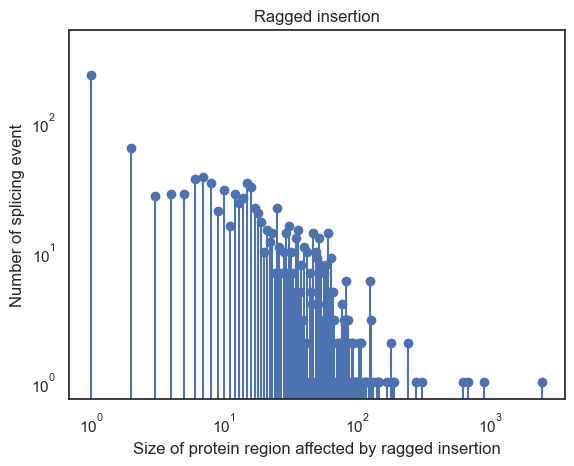

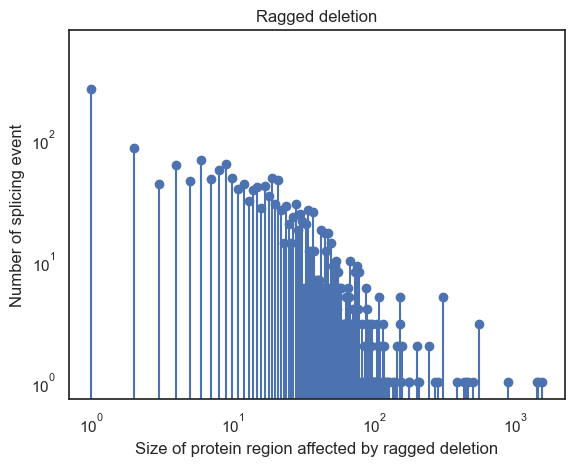

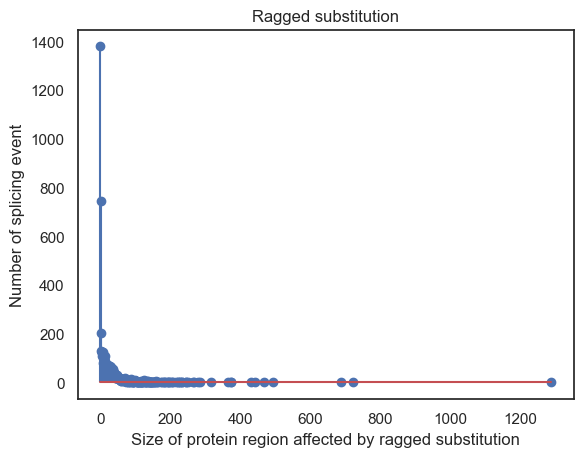

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = xri
y = yri

plt.stem(x, y)
plt.yscale('log')
plt.xscale('log')
plt.title("Ragged insertion")
plt.xlabel('Size of protein region affected by ragged insertion')
plt.ylabel('Number of splicing event')

fig = plt.gcf()

plt.show()
fig.savefig('isoform_event_size_rI.png',dpi=1200)



x = xrd
y = yrd

plt.stem(x, y)
plt.yscale('log')
plt.xscale('log')
plt.title("Ragged deletion")
plt.xlabel('Size of protein region affected by ragged deletion')
plt.ylabel('Number of splicing event')

fig = plt.gcf()

plt.show()
fig.savefig('isoform_event_size_rD.png',dpi=1200)



x = xrs
y = yrs

plt.stem(x, y)


plt.title("Ragged substitution")
plt.xlabel('Size of protein region affected by ragged substitution')
plt.ylabel('Number of splicing event')

fig = plt.gcf()

plt.show()
fig.savefig('isoform_event_size_rS.png',dpi=1200)


/var/folders/yj/q7ccjqsx2rg2czn92rx0_8sc0000gn/T/ipykernel_48015/3623576487.py:9: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(xrs, shade=True, bw=0.5, color="olive")
/var/folders/yj/q7ccjqsx2rg2czn92rx0_8sc0000gn/T/ipykernel_48015/3623576487.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(xrs, shade=True, bw=0.5, color="olive")


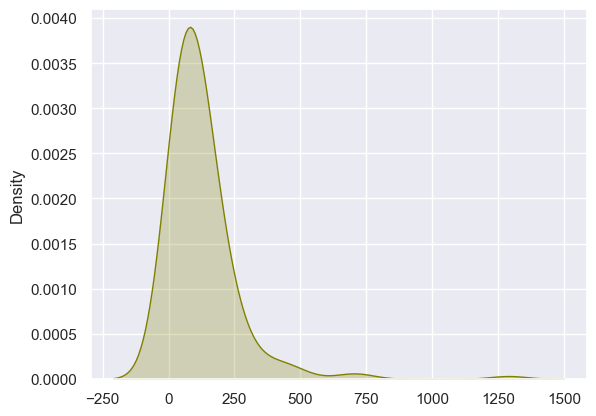

In [15]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('iris')

# Large bandwidth
sns.kdeplot(xrs, shade=True, bw=0.5, color="olive")
plt.show()

In [16]:
print(xrs)

[17, 45, 7, 63, 22, 98, 175, 80, 52, 2, 55, 39, 1, 15, 25, 190, 0, 3, 100, 11, 20, 14, 16, 35, 61, 49, 12, 126, 28, 29, 60, 6, 21, 9, 30, 26, 23, 38, 83, 102, 128, 54, 8, 18, 57, 108, 53, 13, 33, 10, 34, 19, 36, 46, 5, 197, 37, 42, 4, 62, 65, 24, 48, 44, 27, 99, 95, 41, 71, 31, 195, 50, 75, 366, 67, 151, 89, 122, 153, 32, 43, 115, 82, 47, 96, 40, 97, 58, 103, 70, 81, 85, 182, 264, 72, 88, 133, 101, 125, 134, 84, 64, 112, 69, 78, 162, 87, 51, 117, 68, 113, 174, 130, 221, 280, 164, 372, 158, 140, 688, 105, 116, 73, 66, 56, 91, 104, 228, 244, 79, 59, 160, 77, 93, 121, 154, 129, 119, 144, 74, 107, 136, 185, 124, 92, 110, 494, 135, 149, 209, 120, 284, 76, 139, 193, 111, 118, 1289, 442, 94, 90, 86, 722, 202, 146, 222, 216, 467, 205, 131, 142, 143, 233, 251, 232, 246, 145, 432, 229, 148, 181, 157, 374, 315, 269, 106]


In [4]:
from biosurfer.plot.plotting import IsoformPlot

ModuleNotFoundError: No module named 'biosurfer'

ModuleNotFoundError: No module named 'biosurfer'